# Problem statement (Term Deposit Sale)
<b>Goal</b>

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio

<b>Attribute informationInput variables:</b>

<b>Bank client data:</b>

1.age:Continuous feature 

2.job:Type of job (management, technician, entrepreneur, blue-collar, etc.)

3.marital: marital status(married, single, divorced)

4.education:education level (primary, secondary, tertiary)

5.default: has credit in default? 

6.housing: has housing loan? 

7.loan: has personal loan?

8.balance in account

<b>Related to previous contact:</b>

9.contact: contact communication type

10.month: last contact month of year

11.day: last contact day of the month

12.duration: last contact duration, in seconds

<b>*Other attributes:</b>

13.campaign: number of contacts performed during this campaign and for this client

14.pdays: number of days that passed by after the client was last contacted from a previous campaign(-1 tells us the person has not been contacted or contact period is beyond 900 days)

15.previous: number of contacts performed before this campaign and for this client

16.poutcome: outcome of the previous marketing campaign

<b>Output variable (desired target):</b>

17.Target: Tell us has the client subscribed a term deposit. (Yes, No)



### Comments
Since the goal of the model is to identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.
- To increase the hit ratio we need <b>high precision</b>. However if the investments are low then high recall value is better.
- Duration is not required for identifying target customers for campaign. But maybe be usefull to benchmark the average call duration to be spent on targetted customers during the campaign. So it will be dropped from the model 

#### Import Libraries

In [309]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
# import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

# plt.style.use('ggplot')
# pd.options.display.float_format = '{:,.4f}'.format

from IPython.core.display import display, HTML

# display(HTML("<style>.container { width:95% !important; }</style>"))

import missingno as msno_plot #--------------plotting missing values

In [310]:
# Import data file and looking at first few records to get a look and fee of the records
bank_df = pd.read_csv('bank-full.csv')
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

# Deliverable 1

## Univariate analysis(12marks)

a.Univariate analysis –data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

b.Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

c.Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

In [311]:
# checking the shape and datatypes
display(bank_df.shape)
display(bank_df.info())

(45211, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

<b>Comment</b>
- the data doesnt have primary key
- Many of the columns are of type object i.e. strings. These need to be converted to ordinal type.

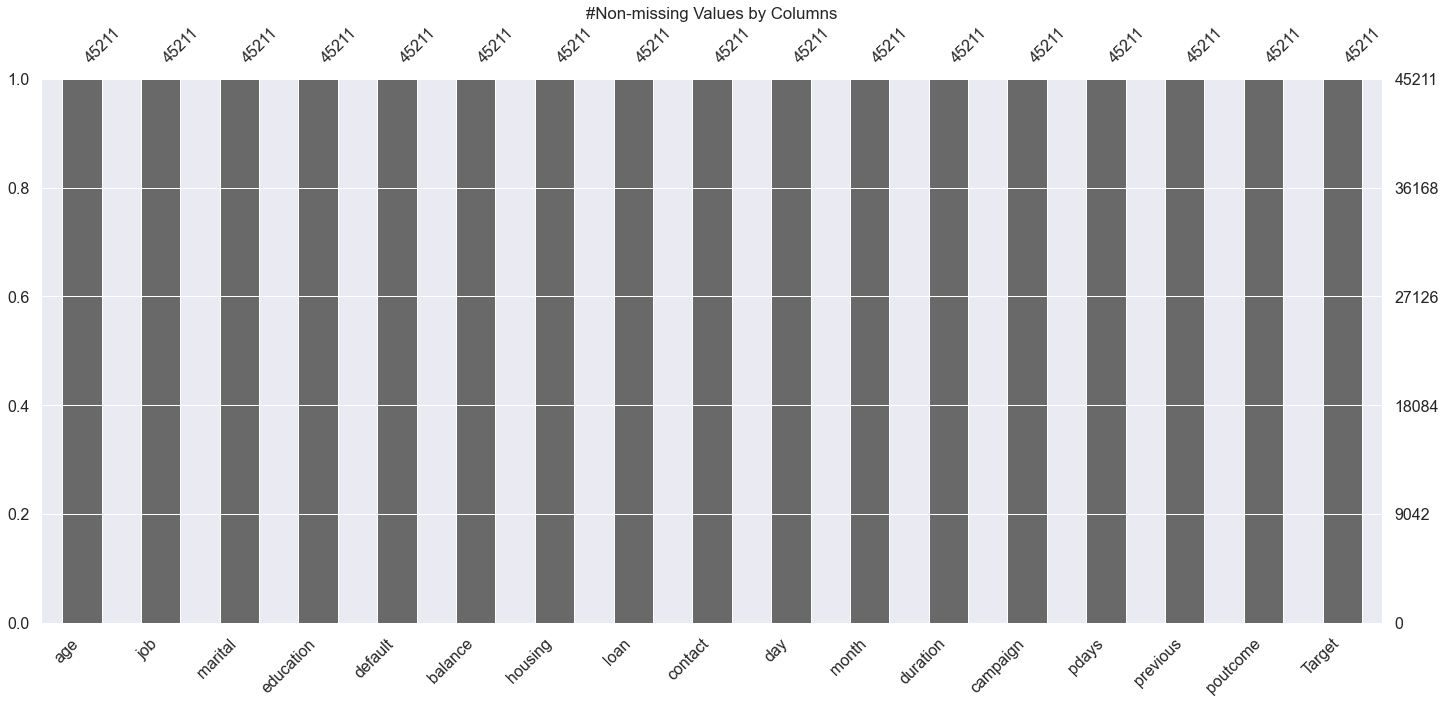

In [312]:
#checking the missing values using Barplot
plt.title('#Non-missing Values by Columns')
msno_plot.bar(bank_df);

Comment
- no missing values

In [313]:
#checking the unique values
for i in bank_df.columns:
        print(i,bank_df[i].unique())
        print()

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital ['married' 'single' 'divorced']

education ['tertiary' 'secondary' 'unknown' 'primary']

default ['no' 'yes']

balance [ 2143    29     2 ...  8205 14204 16353]

housing ['yes' 'no']

loan ['no' 'yes']

contact ['unknown' 'cellular' 'telephone']

day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration [ 261  151   76 ... 1298 1246 1556]

campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31

Comment
- some columns has value unknown. Need to consider how to handle them in later sections

In [314]:
#checking the mean, std, quartile, min and max values. 
display(bank_df.describe().astype(int).T)

count  mean   std   min  25%  50%   75%     max
age       45211    40    10    18   33   39    48      95
balance   45211  1362  3044 -8019   72  448  1428  102127
day       45211    15     8     1    8   16    21      31
duration  45211   258   257     0  103  180   319    4918
campaign  45211     2     3     1    1    2     3      63
pdays     45211    40   100    -1   -1   -1    -1     871
previous  45211     0     2     0    0    0     0     275

##  Checking the distributions of columns

In [315]:
for column in bank_df[bank_df.columns]:
    display(column)
    display(bank_df[column].value_counts())    

'age'

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

'job'

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

'marital'

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

'education'

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

'default'

no     44396
yes      815
Name: default, dtype: int64

'balance'

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

'housing'

yes    25130
no     20081
Name: housing, dtype: int64

'loan'

no     37967
yes     7244
Name: loan, dtype: int64

'contact'

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

'day'

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

'month'

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

'duration'

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

'campaign'

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

'pdays'

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

'previous'

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

'poutcome'

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

'Target'

no     39922
yes     5289
Name: Target, dtype: int64

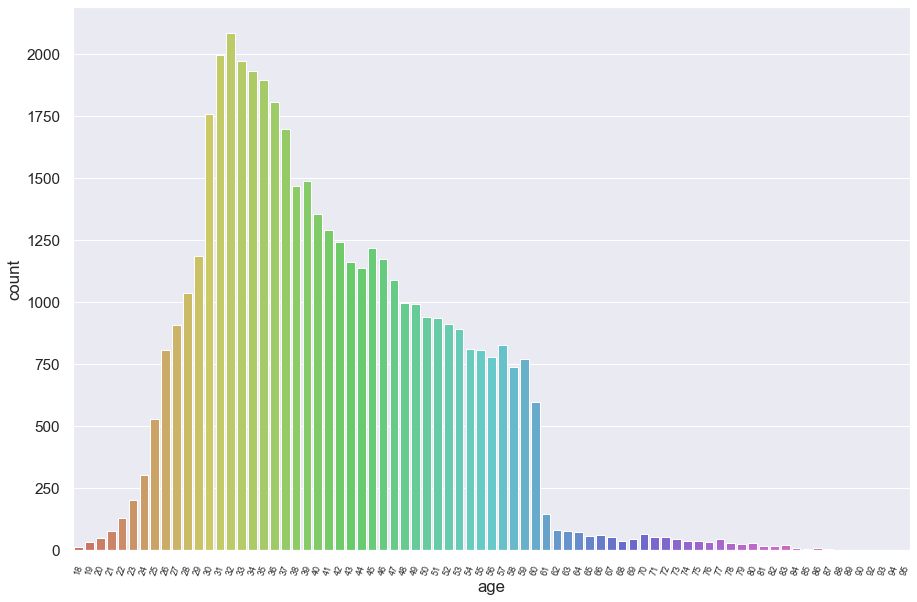

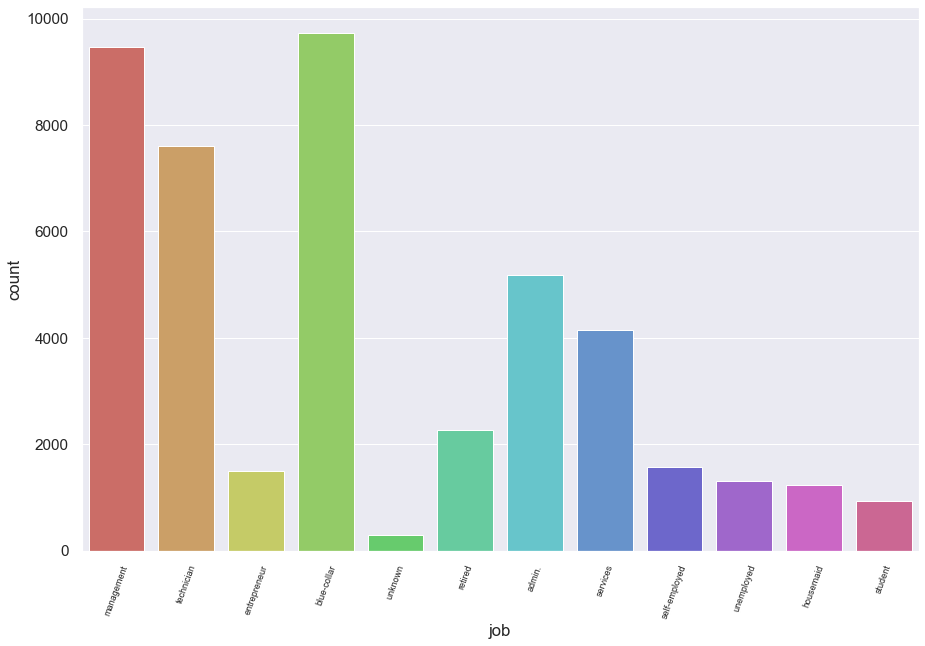

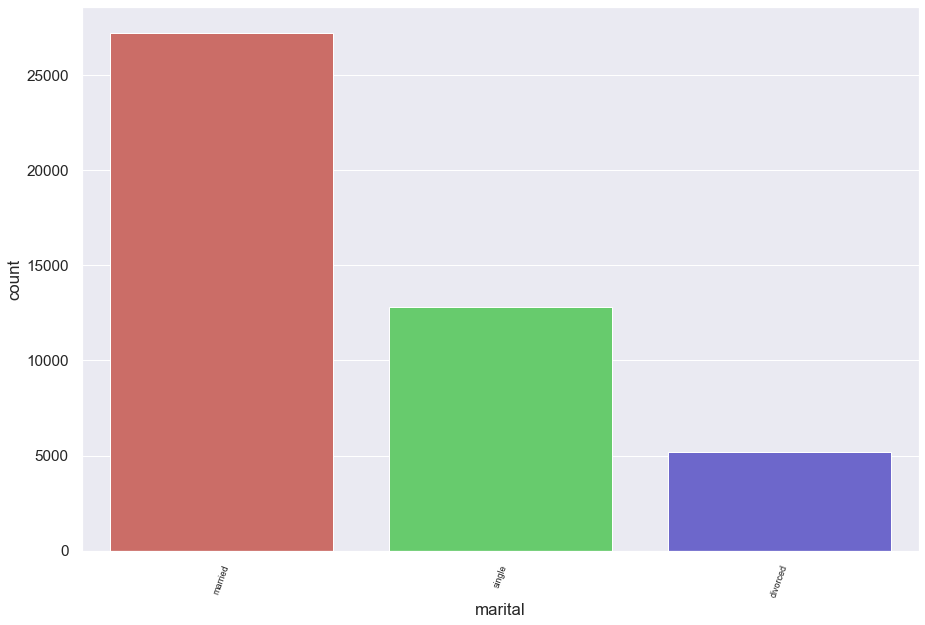

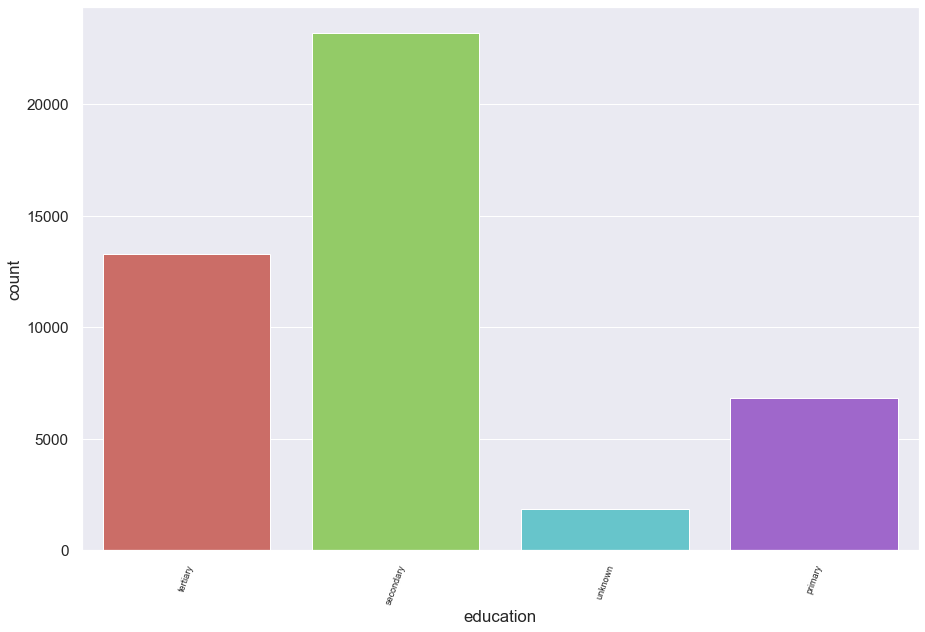

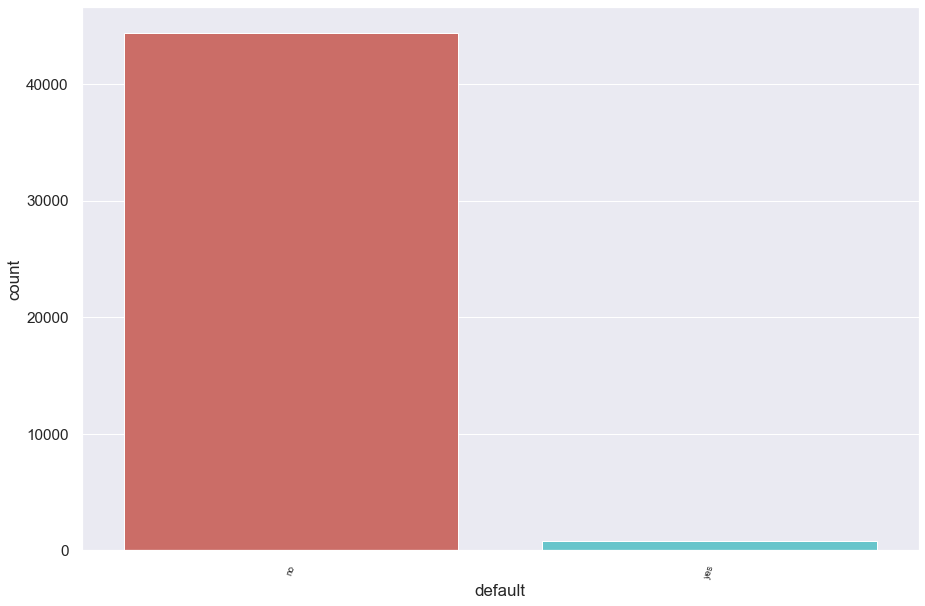

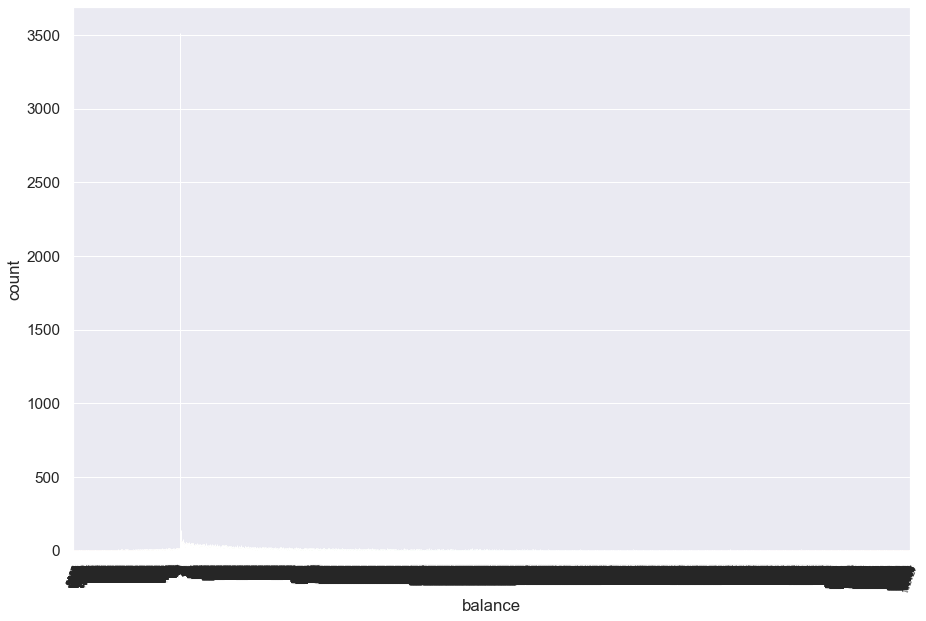

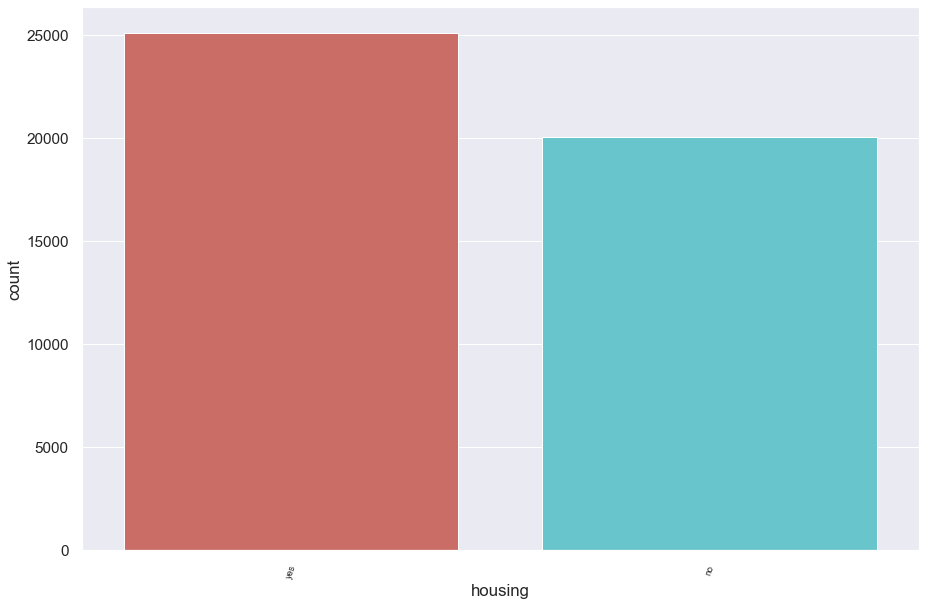

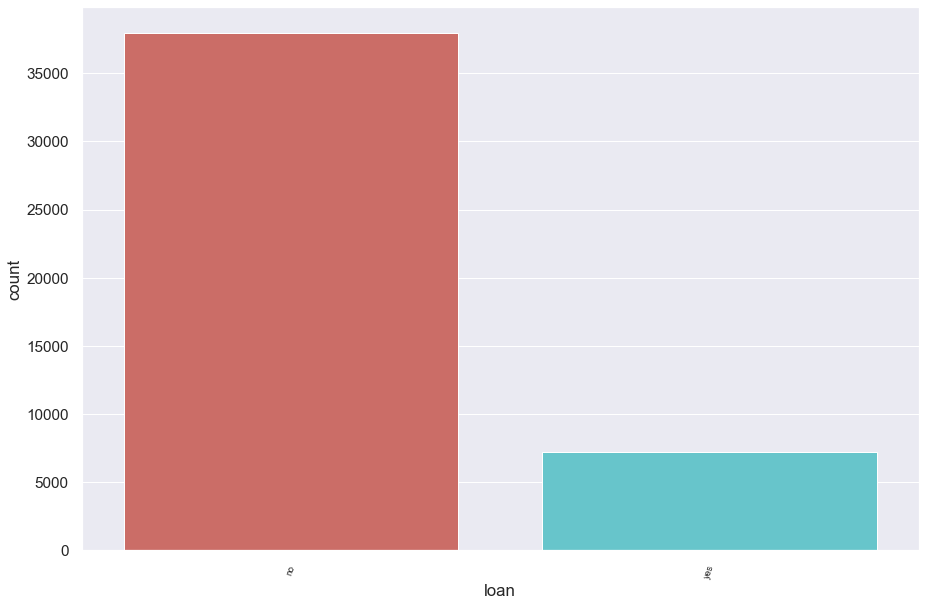

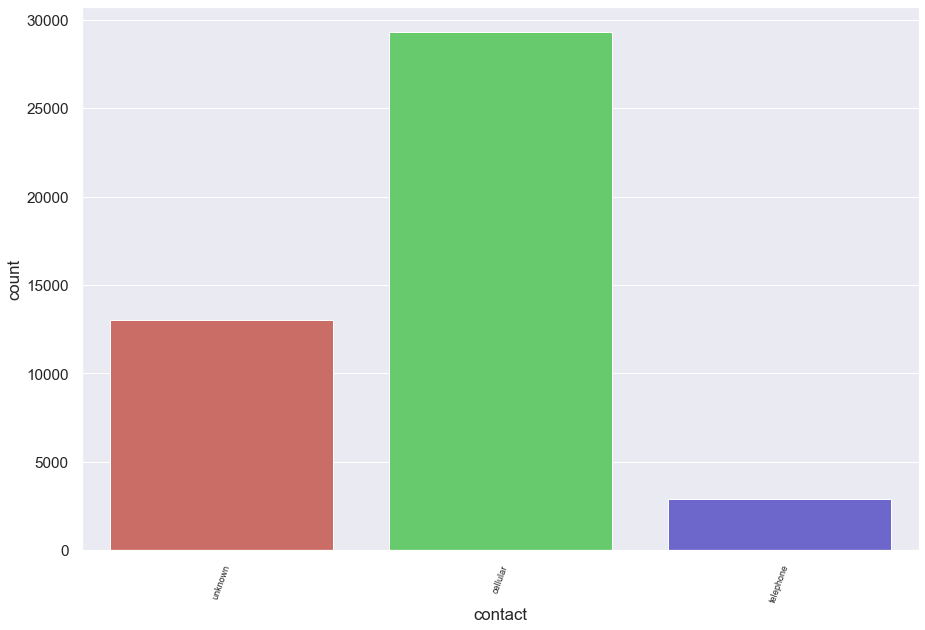

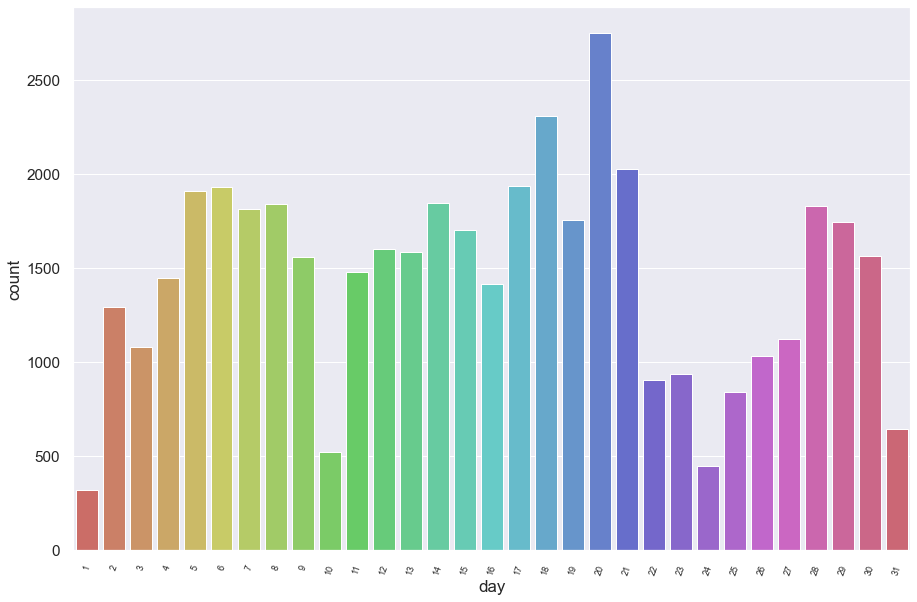

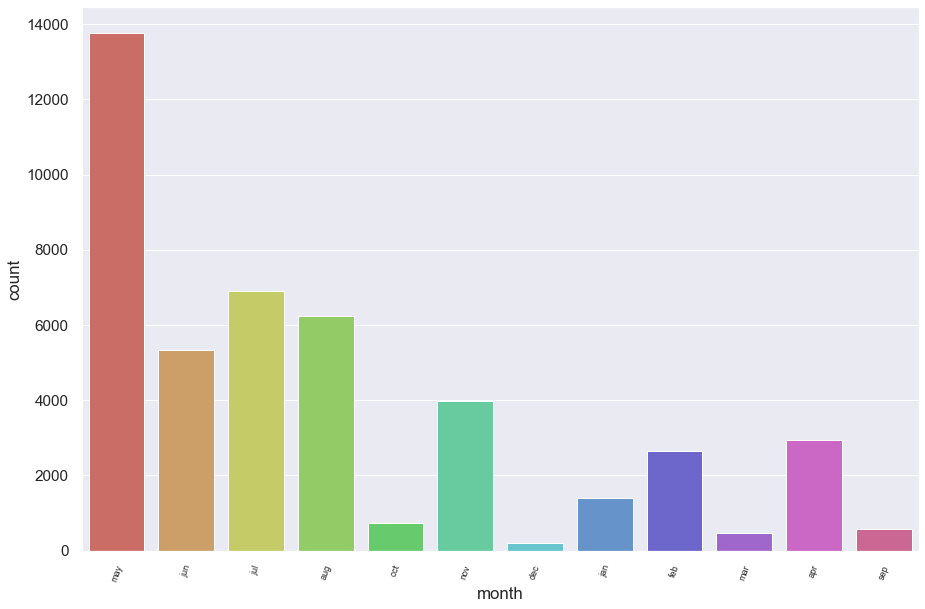

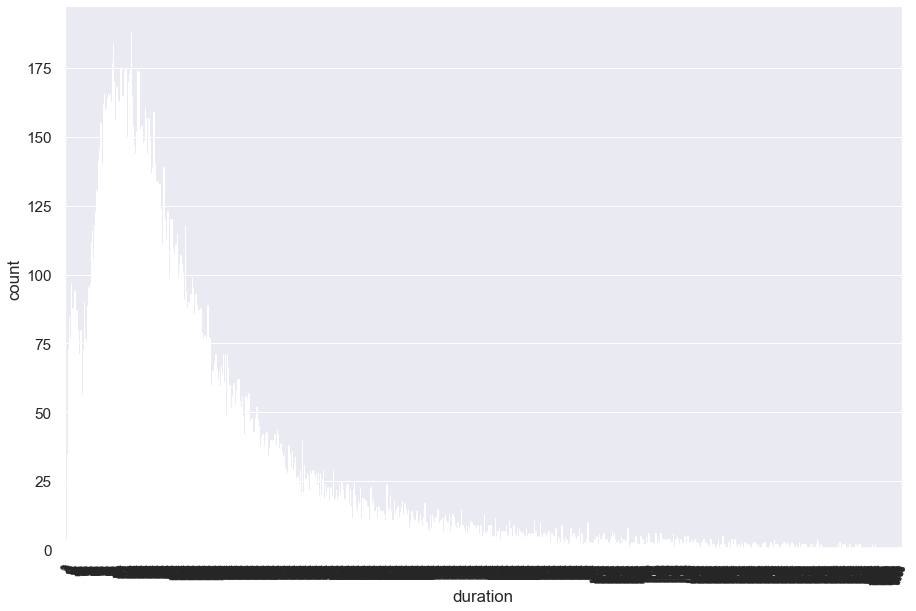

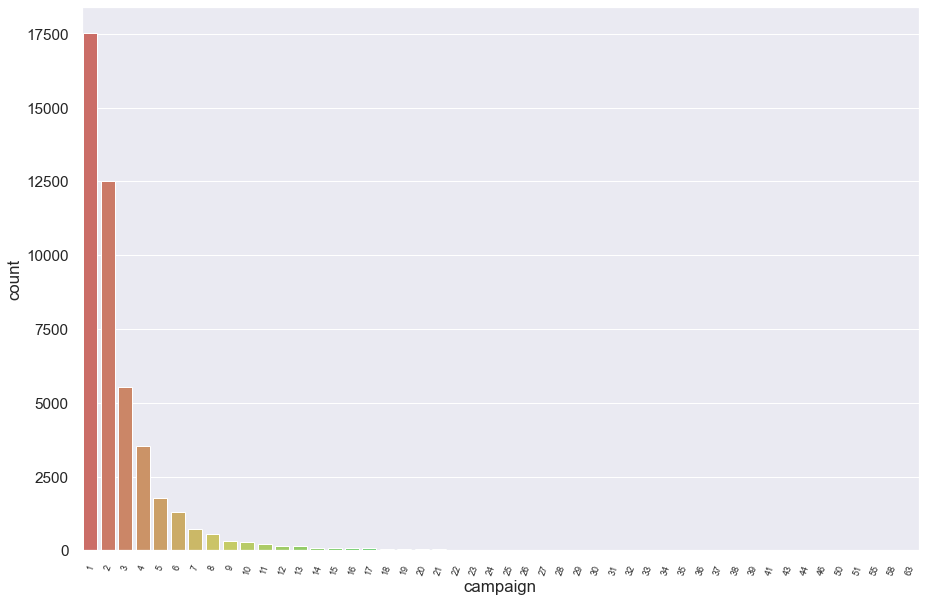

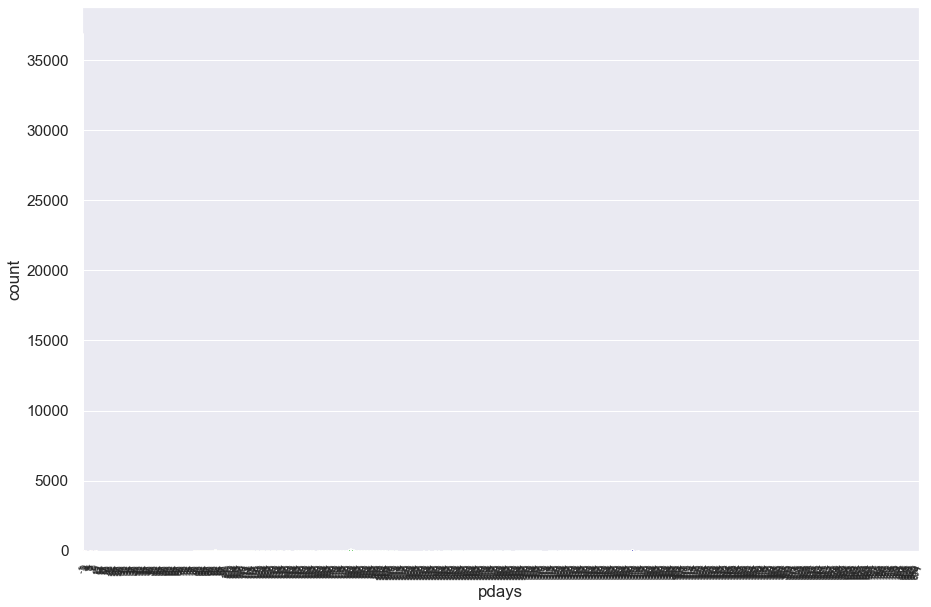

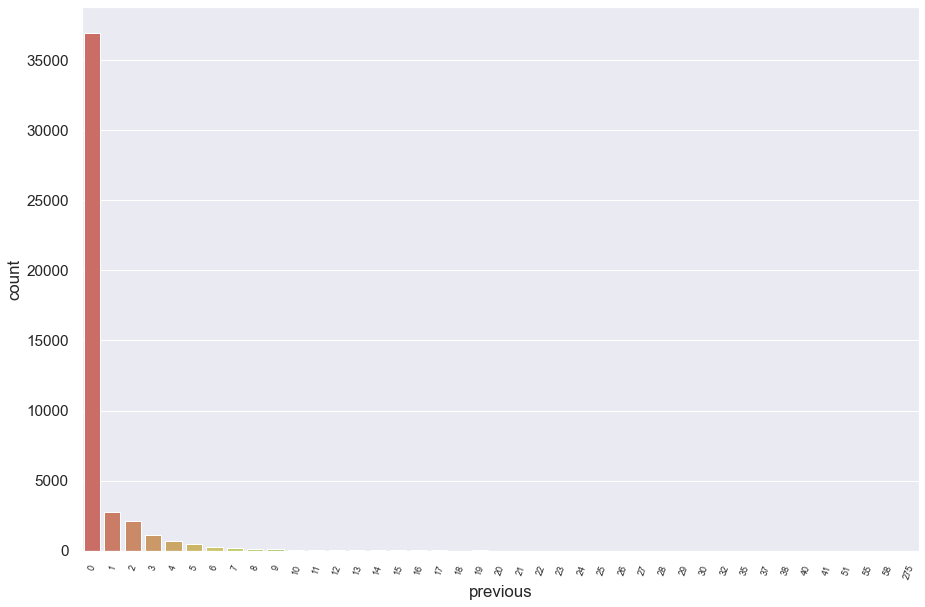

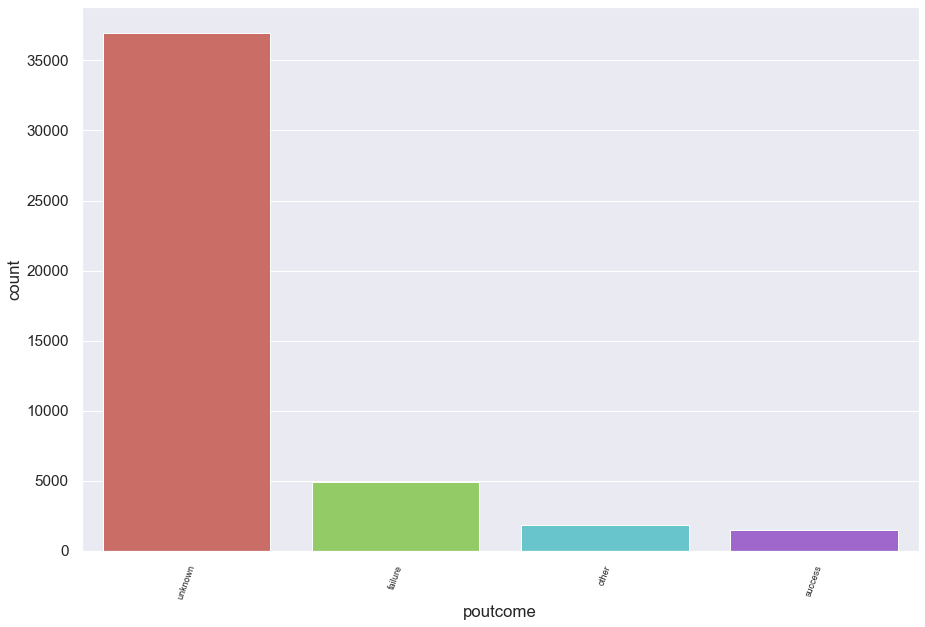

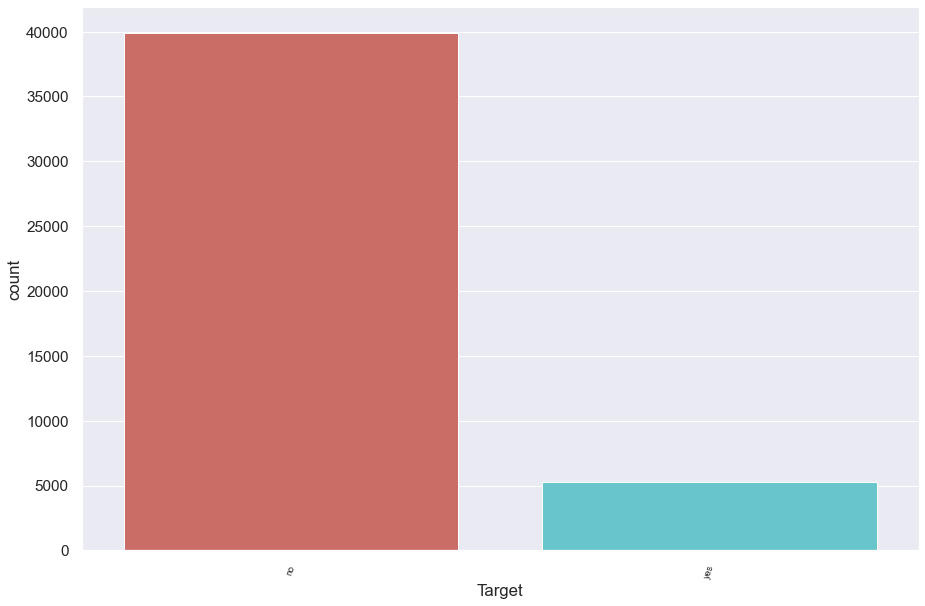

In [316]:
for i in bank_df[bank_df.columns]:
    plt.figure(figsize=(15,10))
    plt.xticks(fontsize=9,rotation=70)
    sns.countplot(x=i,data=bank_df,palette='hls')
    plt.show()

#### Findings
- Age is right skewed. Looks like more customers are in the 30s and 40s. 50% of the customers are/above 39 years of age
- job: blue-collar and management job customers are more compared to others.
- marital: more married customers than single and divorced.
- education: most customers have secondary education
- default: default customers are very low
- balance: vast range. Looks like there are outliers. 25% of the customer balance is or above 1428 . min balance is negative(-8,019) and the max balance is very high(102,127)
- housing: 50% or above have housing loan
- loan: few customers in the dataset have personal loan
- contact: most of the customers in the datasets the communication type  is cellular
- day: More contacts are done on 20th of the month
- month: last contact month is high in may
- duration: is right skewed. Max last contact duration is 4918 seconds(1.36hours). 50% of the last contact duration is 3 min or more.
- campaign: Is right skewed. Max campaingn contacts is 63 whereas min is 1. 
- pdays: Looks like there are outliers. Atleast 75% of the customers are not contacted or contact period is beyond 900 days
- previous: is right skewed. Atleast 75% of the customers are not contacted before this campaign. Max camtacted times is 275.
- poutcome: number of unknowns is very high compared to success, failure and other. 
- Target: Few subscription customers

### Verifying how age is impacting term deposit Subcription

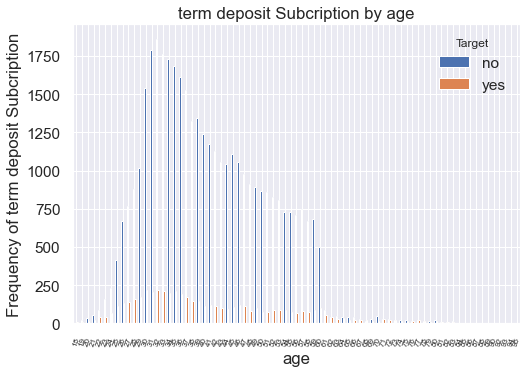

In [317]:
pd.crosstab(bank_df.age,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by age') 
plt.xlabel('age') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

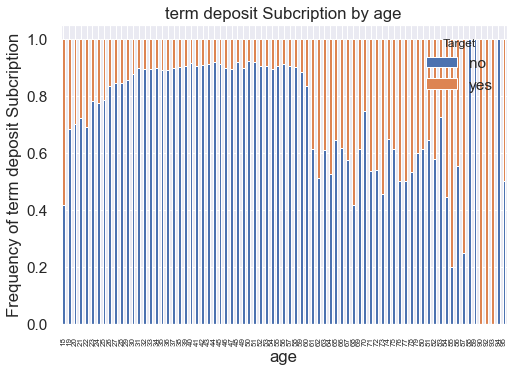

In [318]:
table=pd.crosstab(bank_df.age,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=8)
plt.title('term deposit Subcription by age') 
plt.xlabel('age') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

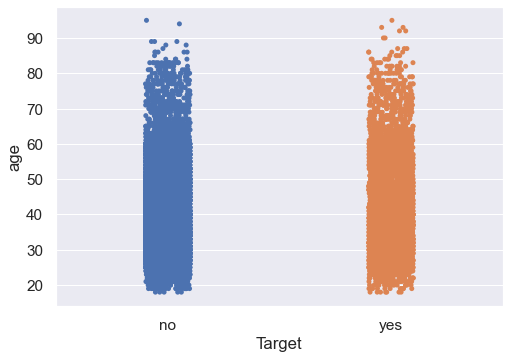

In [319]:
sns.stripplot(x="Target", y="age", data=bank_df, jitter=True)
plt.show();

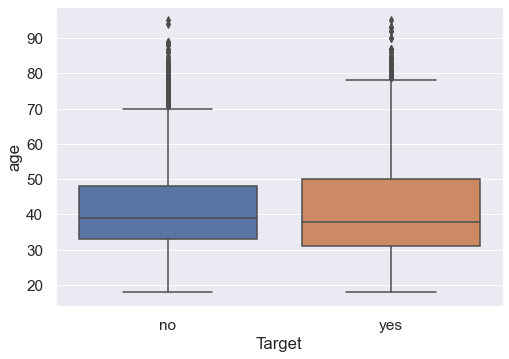

In [320]:
sns.boxplot(data=bank_df, x="Target", y="age")
plt.show()

Comment
- Term Deposit Subscription percentage at younger and older age looks high
- However Age impact on target is quite same for both subscribe/no subscribe. So it is not a good indicator for predication. 

### Verifying how job is impacting term deposit Subcription

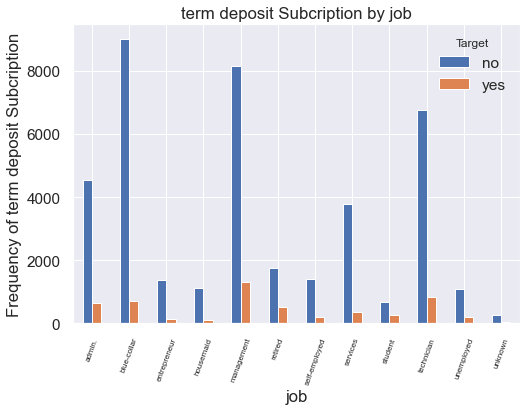

In [321]:
pd.crosstab(bank_df.job,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by job') 
plt.xlabel('job') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

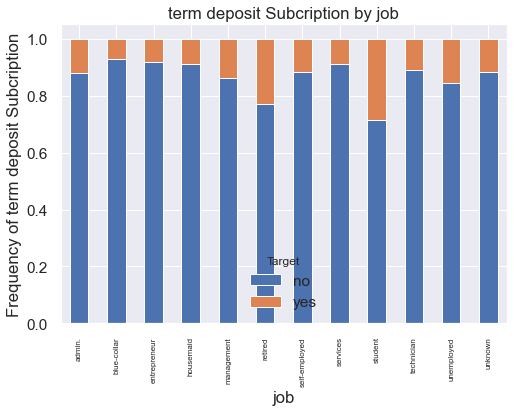

In [322]:
table=pd.crosstab(bank_df.job,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=8)
plt.title('term deposit Subcription by job') 
plt.xlabel('job') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- Similar to age, retired and students are subscribing term deposit compared to others.

### Verifying how marital is impacting term deposit Subcription

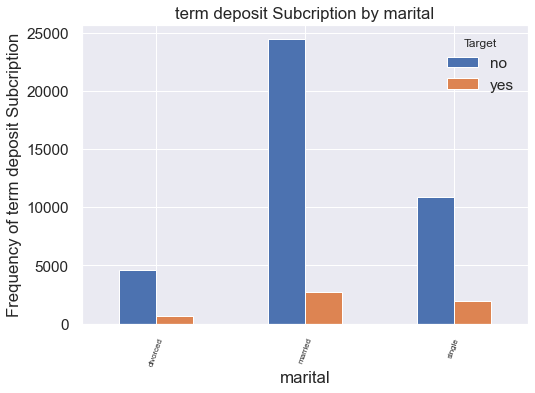

In [323]:
pd.crosstab(bank_df.marital,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by marital') 
plt.xlabel('marital') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

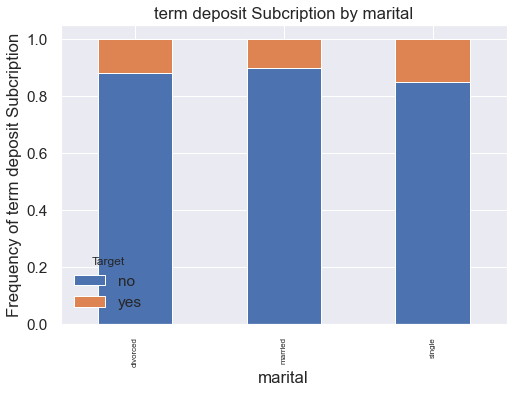

In [324]:
table=pd.crosstab(bank_df.marital,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=8)
plt.title('term deposit Subcription by marital') 
plt.xlabel('marital') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- Singles category has subscribing percent more compared to others.
- overall slight Impact on subription/no subscription looks. So will use as a indicator for prediction. 

### Verifying how education is impacting term deposit Subcription

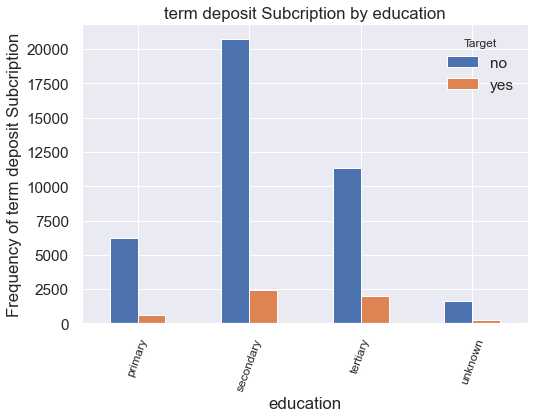

In [325]:
pd.crosstab(bank_df.education,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=12,rotation=70)
plt.title('term deposit Subcription by education') 
plt.xlabel('education') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

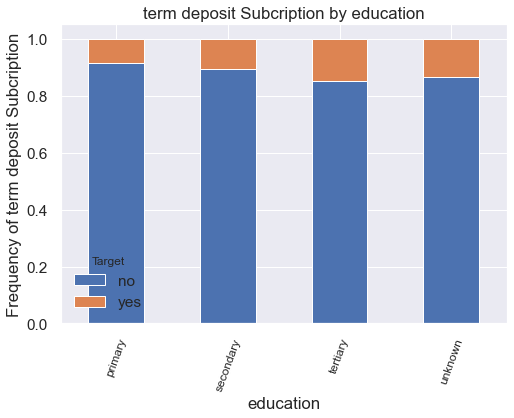

In [326]:
table=pd.crosstab(bank_df.education,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=12,rotation=70)
plt.title('term deposit Subcription by education') 
plt.xlabel('education') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- Teritiary are subscribing more compared to primary and secondary
- overall slight Impact on subription/no subscription looks. So will use as a indicator for prediction. 

### Verifying how loan default is impacting term deposit Subcription

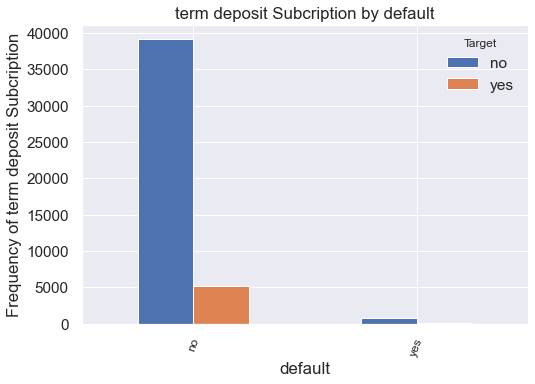

In [327]:
pd.crosstab(bank_df.default,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=12,rotation=70)
plt.title('term deposit Subcription by default') 
plt.xlabel('default') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

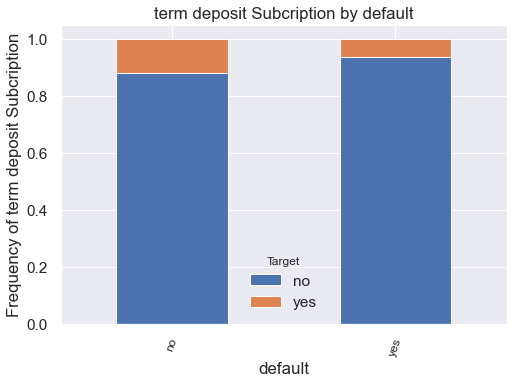

In [328]:
table=pd.crosstab(bank_df.default,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=12,rotation=70)
plt.title('term deposit Subcription by default') 
plt.xlabel('default') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- customers who didnt default are subscribing more compared to defaulters
- overall slight Impact on subription/no subscription looks. So will use as a indicator for prediction. 

### Verifying how housing loan is impacting term deposit Subcription

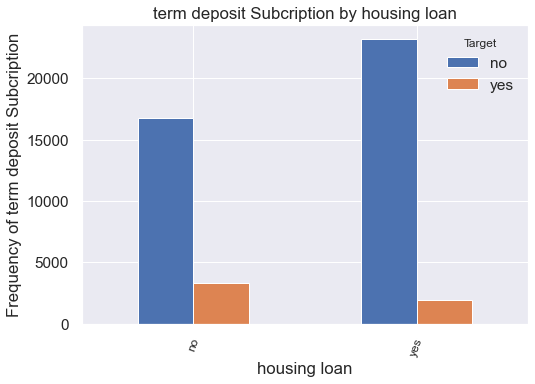

In [329]:
pd.crosstab(bank_df.housing,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=12,rotation=70)
plt.title('term deposit Subcription by housing loan') 
plt.xlabel('housing loan') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

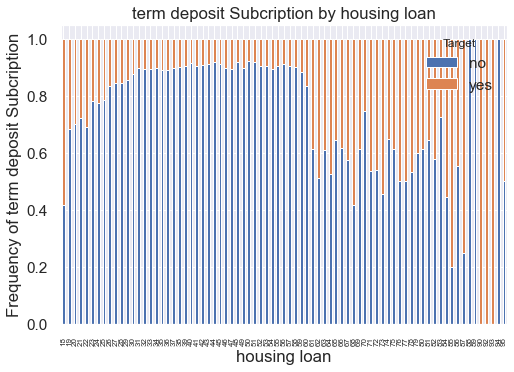

In [330]:
table=pd.crosstab(bank_df.age,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=8,rotation=90)
plt.title('term deposit Subcription by housing loan') 
plt.xlabel('housing loan') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- Younger age and senior age are subscribing more compared to mid age customers.
- overall looks like good Impact on subription/no subscription looks. So will be a good indicator for prediction. 

### Verifying how personal loan is impacting term deposit Subcription

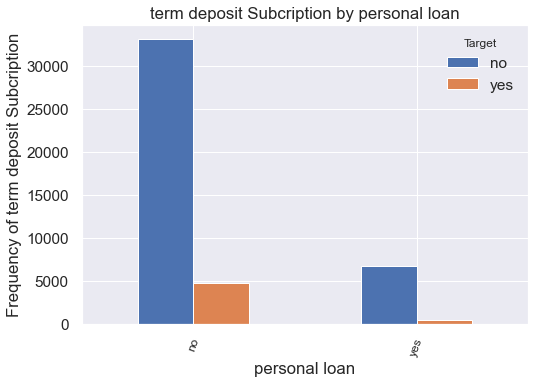

In [331]:
pd.crosstab(bank_df.loan,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=12,rotation=70)
plt.title('term deposit Subcription by personal loan') 
plt.xlabel('personal loan') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

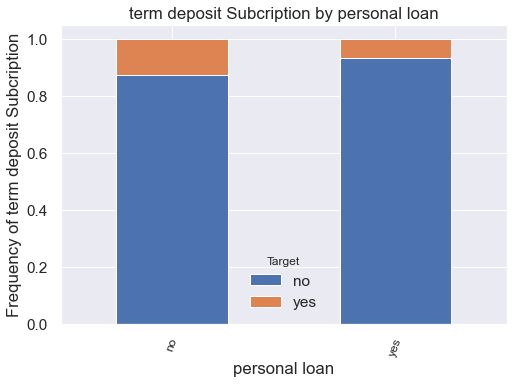

In [332]:
table=pd.crosstab(bank_df.loan,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=12,rotation=70)
plt.title('term deposit Subcription by personal loan') 
plt.xlabel('personal loan') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- Looks like customers who dont have personal loan are subscribing more compared to the one who has personal loan
- overall slight Impact on subription/no subscription looks. So will use as a indicator for prediction. 

### Verifying how account balance is impacting term deposit Subcription

<Figure size 2880x2160 with 0 Axes>

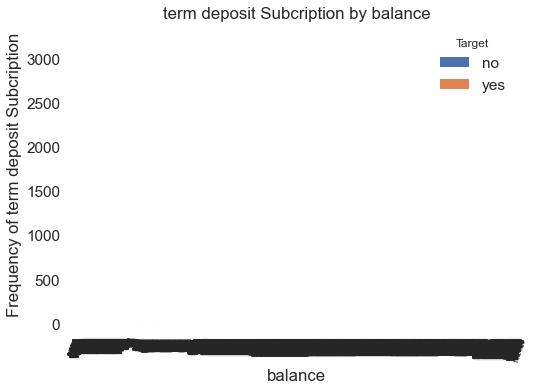

In [333]:
plt.figure(figsize=(40,30))
pd.crosstab(bank_df.balance,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by balance') 
plt.xlabel('balance') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

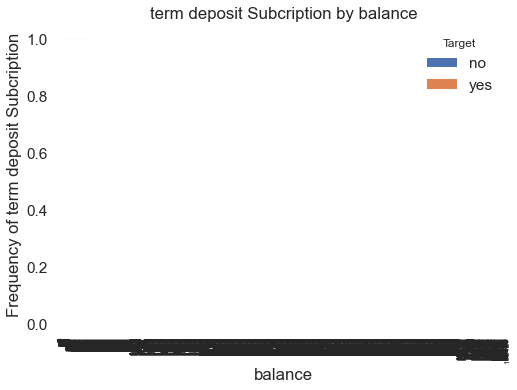

In [334]:
table=pd.crosstab(bank_df.balance[bank_df['balance']>-1],bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=8)
plt.title('term deposit Subcription by balance') 
plt.xlabel('balance') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

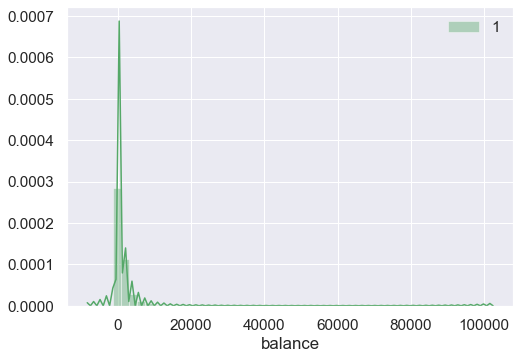

In [335]:
#sns.distplot(bank_df[bank_df['balance']>0]['Target'],color='r',label=0)
sns.distplot(bank_df['balance'],color='g',label=1)
plt.legend()
plt.show()

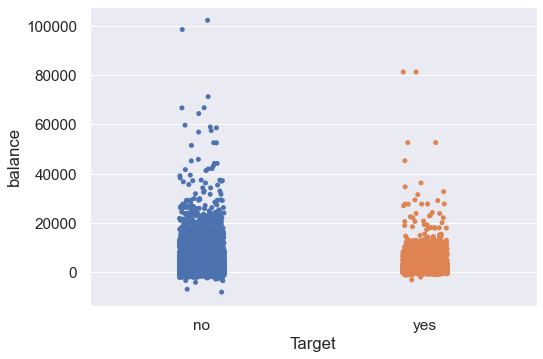

In [336]:
sns.stripplot(x="Target", y="balance", data=bank_df, jitter=True)
plt.show();

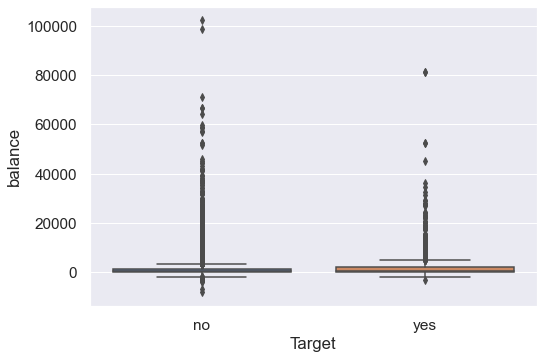

In [337]:
sns.boxplot(data=bank_df, x="Target", y="balance")
plt.show()

Comment
- Balance have vast values for both Target values No and Yes
- From the box plot, there is a slight overlap. Can be used for prediction.

### Verifying how contact communication type is impacting term deposit Subcription

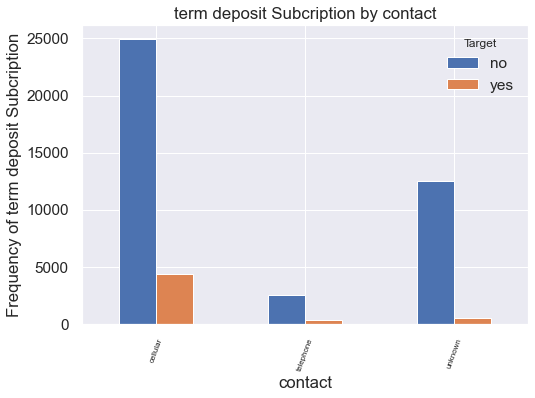

In [338]:
pd.crosstab(bank_df.contact,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by contact') 
plt.xlabel('contact') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

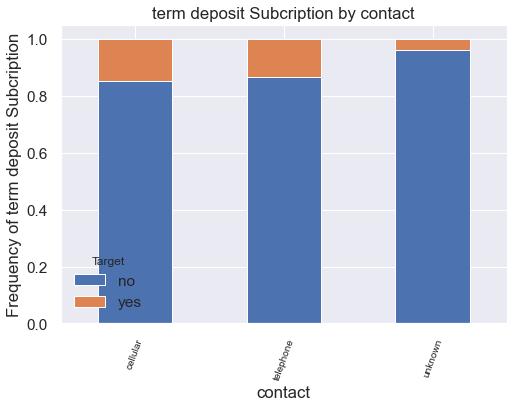

In [339]:
table=pd.crosstab(bank_df.contact,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=10,rotation=70)
plt.title('term deposit Subcription by contact') 
plt.xlabel('contact') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- Looks like cellular have sligtly high subscription than telephone but very high compared to unknown.
- unknown can be new customers who didnt exist in the last campaign. will be used as a predictor.

### Verifying how contact month is impacting term deposit Subcription

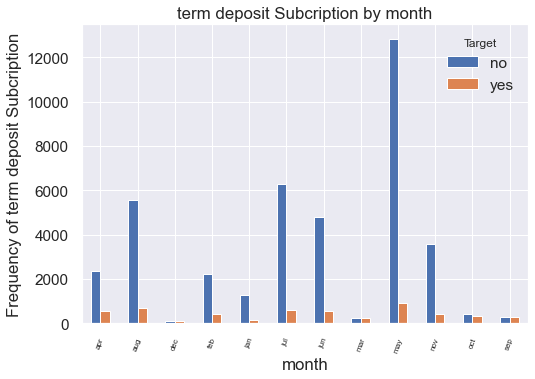

In [340]:
pd.crosstab(bank_df.month,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by month') 
plt.xlabel('month') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

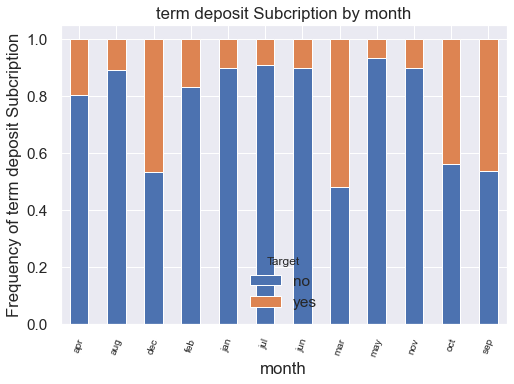

In [341]:
table=pd.crosstab(bank_df.month,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=10,rotation=70)
plt.title('term deposit Subcription by month') 
plt.xlabel('month') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- Looks like mar, dec, sep and oct high subscription rate. So month is impacting the subscription rate. 
- overall slight Impact on subription/no subscription looks. So will use as a indicator for prediction. 

### Verifying how last contact day is impacting term deposit Subcription

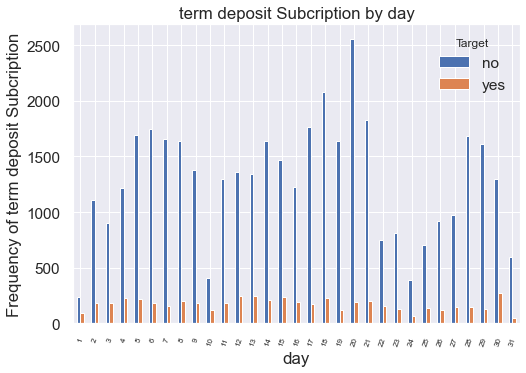

In [342]:
pd.crosstab(bank_df.day,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by day') 
plt.xlabel('day') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

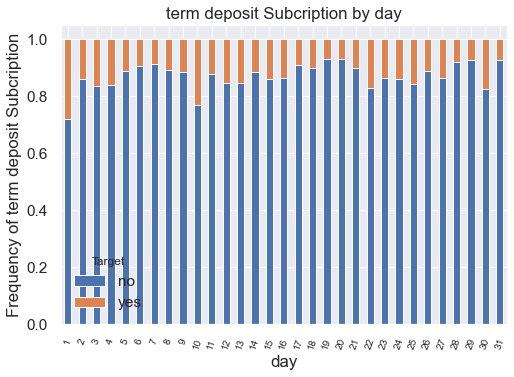

In [343]:
table=pd.crosstab(bank_df.day,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=10,rotation=70)
plt.title('term deposit Subcription by day') 
plt.xlabel('day') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- looks like subscription rate changes by day
- overall slight Impact on subription/no subscription looks. So will use as a indicator for prediction. 

### Verifying how last contact duration is impacting term deposit Subcription

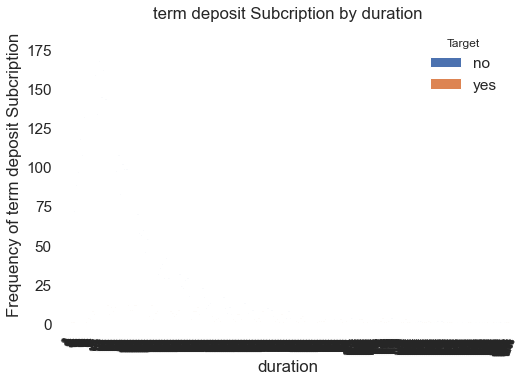

In [344]:
pd.crosstab(bank_df.duration,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by duration') 
plt.xlabel('duration') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

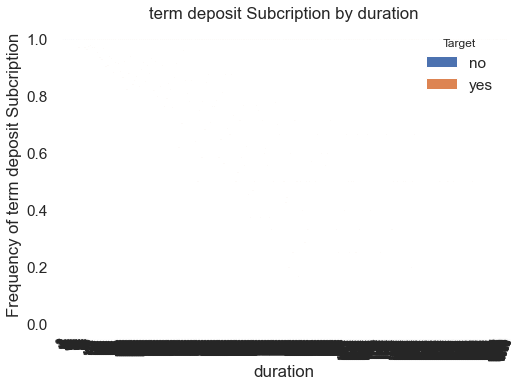

In [345]:
table=pd.crosstab(bank_df.duration,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=10,rotation=70)
plt.title('term deposit Subcription by duration') 
plt.xlabel('duration') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

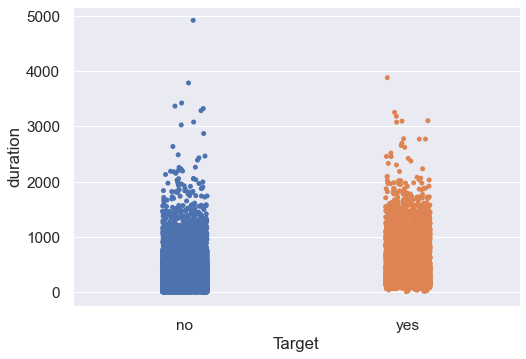

In [346]:
sns.stripplot(x="Target", y="duration", data=bank_df, jitter=True)
plt.show();

Comment
- Looks like duration doesnt have much impact on subscription. 
- Duration is not good indicator for target customer selection as it is done later. 

### Verifying how contact performed in this campaign is impacting term deposit Subcription

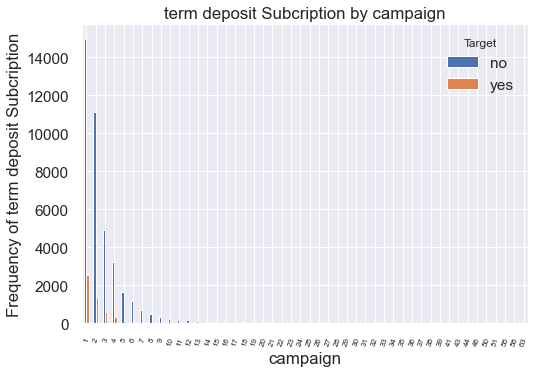

In [347]:
pd.crosstab(bank_df.campaign,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by campaign') 
plt.xlabel('campaign') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

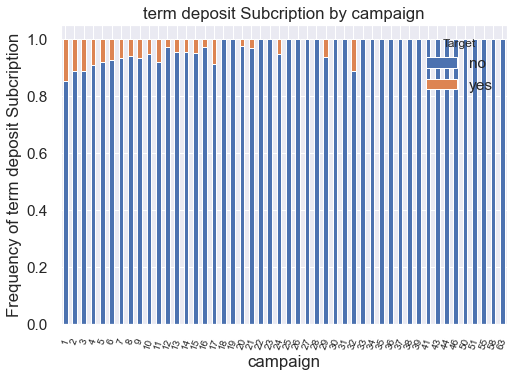

In [348]:
table=pd.crosstab(bank_df.campaign,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=10,rotation=70)
plt.title('term deposit Subcription by campaign') 
plt.xlabel('campaign') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

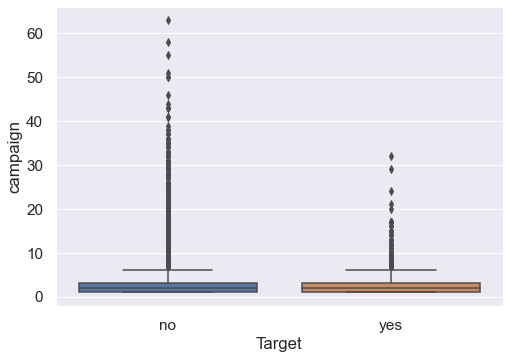

In [349]:
sns.boxplot(data=bank_df, x="Target", y="campaign")
plt.show()

Comment
- Looks like campaign is impacting subscription
- as the box plot is similar, may not be a good indicator for prediction

### Verifying how pdays(days passed by after contact from previous campaign) is impacting term deposit Subcription

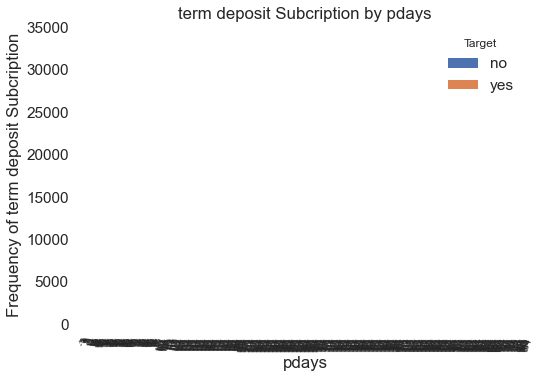

In [350]:
pd.crosstab(bank_df.pdays,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by pdays') 
plt.xlabel('pdays') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

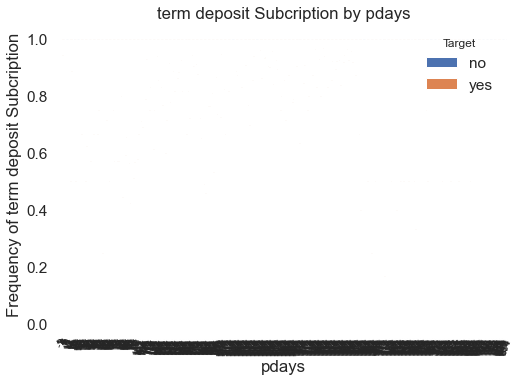

In [351]:
table=pd.crosstab(bank_df.pdays,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=10,rotation=70)
plt.title('term deposit Subcription by pdays') 
plt.xlabel('pdays') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

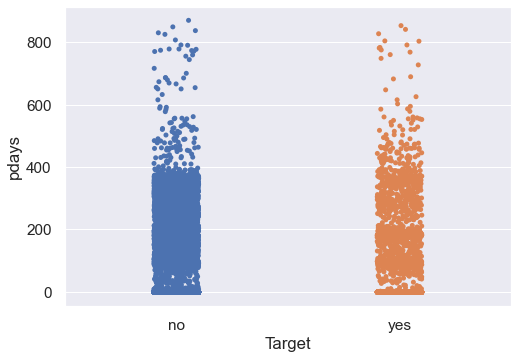

In [352]:
sns.stripplot(x="Target", y="pdays", data=bank_df, jitter=True)
plt.show();

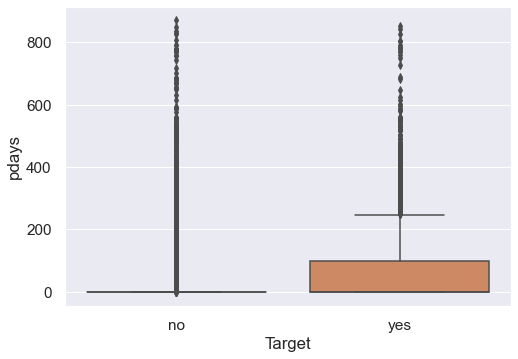

In [353]:
sns.boxplot(data=bank_df, x="Target", y="pdays")
plt.show()

Comment
- Looks like pdays doesnt have much impact on subscription
- as the box plot is similar, may not be a good indicator for prediction

### Verifying how no of contacts performed previous to this campaign is impacting term deposit Subcription

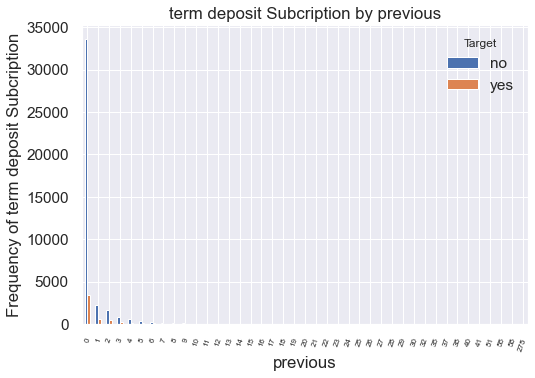

In [354]:
pd.crosstab(bank_df.previous,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by previous') 
plt.xlabel('previous') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

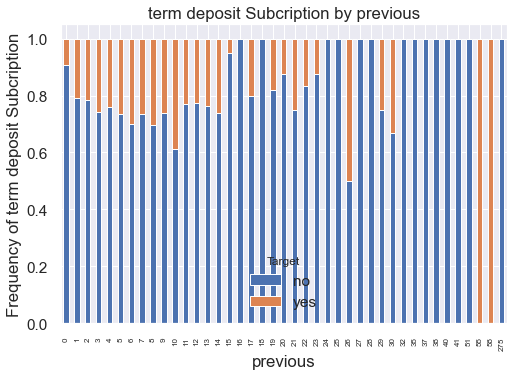

In [355]:
table=pd.crosstab(bank_df.previous,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=8)
plt.title('term deposit Subcription by previous') 
plt.xlabel('previous') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

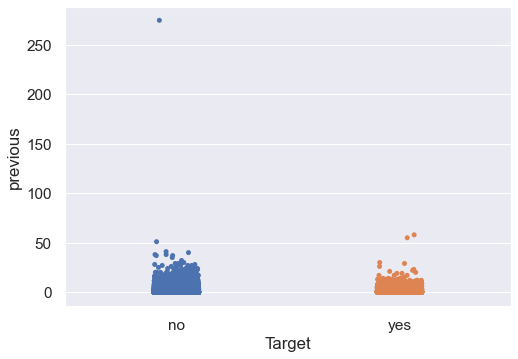

In [356]:
sns.stripplot(x="Target", y="previous", data=bank_df, jitter=True)
plt.show();

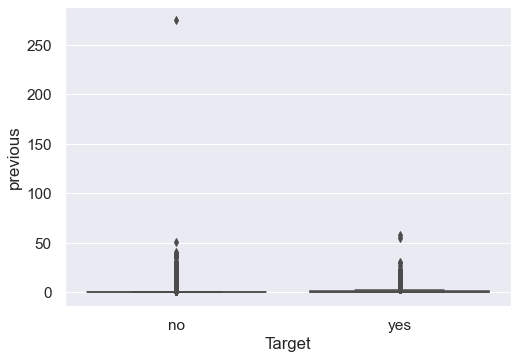

In [357]:
sns.boxplot(data=bank_df, x="Target", y="previous")
plt.show()

Comment
- looks like previous number of contacts is impacting the subscription
- as the box plot is similar, may not be a good indicator for prediction

### Verifying how outcome of previous marketing campaign is impacting term deposit Subcription

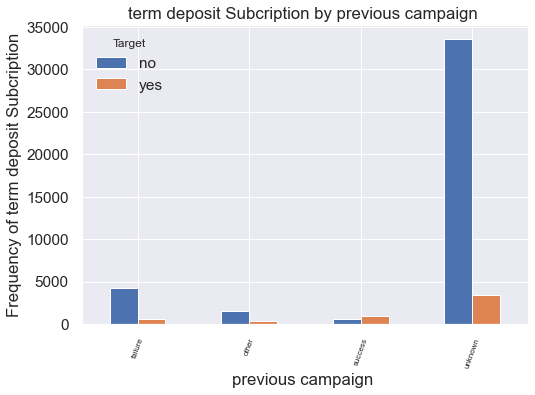

In [358]:
pd.crosstab(bank_df.poutcome,bank_df.Target).plot(kind='bar') 
plt.xticks(fontsize=8,rotation=70)
plt.title('term deposit Subcription by previous campaign ') 
plt.xlabel('previous campaign ') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

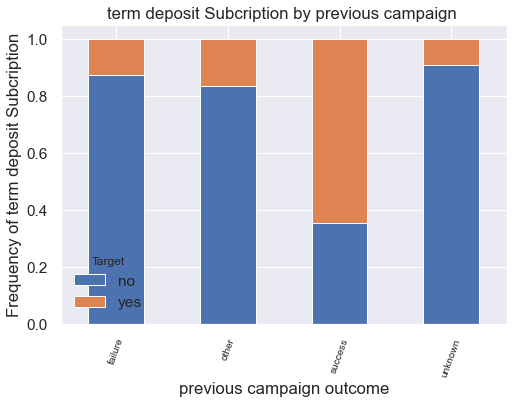

In [359]:
table=pd.crosstab(bank_df.poutcome,bank_df.Target) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.xticks(fontsize=10,rotation=70)
plt.title('term deposit Subcription by previous campaign ') 
plt.xlabel('previous campaign outcome') 
plt.ylabel('Frequency of term deposit Subcription') 
plt.savefig('pur_fre_pout_bar')

Comment
- looks like previous campaign success is impacting subcription
- Can be used for subscription prediction

### Checking and Handling Outliers

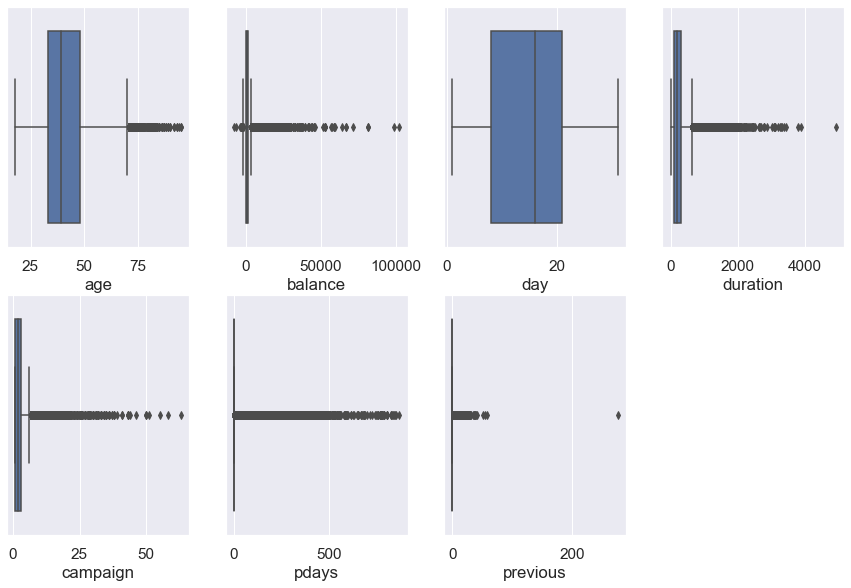

In [360]:
#Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in bank_df[['age','balance','day','duration','campaign','pdays','previous']]:
    plt.subplot(3, 4, pos)
    sns.boxplot(bank_df[i])
    pos += 1 

Comment
- Noticed outliers. To reduce the impact on model, the outliers will be replaced with 1.5 quartile value on both sides

In [361]:
#Outliers Treatment by replacing with the 1.5 of the IQR
col_names=['age','balance','day','duration','campaign','pdays','previous']

display(col_names)

for i in col_names:
    q1, q2, q3 = bank_df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    bank_df[i]=bank_df[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

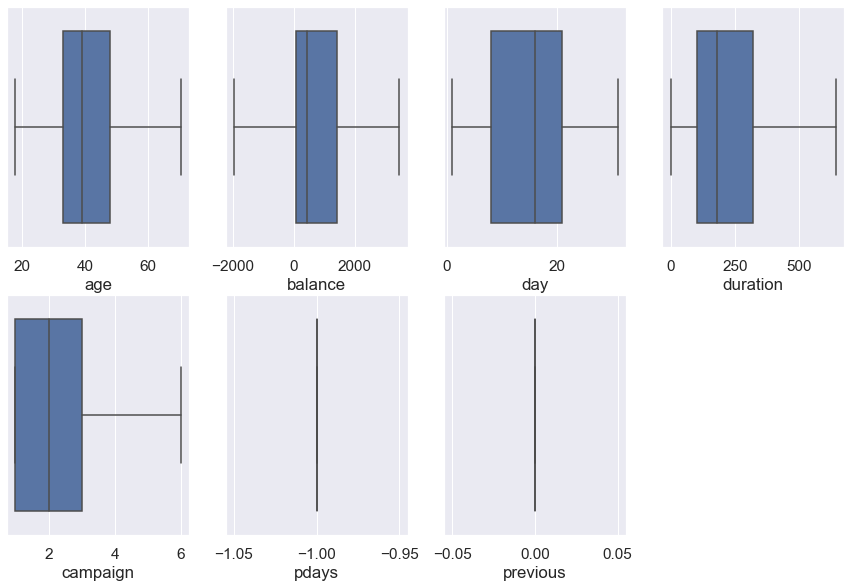

In [362]:
#Confirming No Outliers after fixing
plt.figure(figsize=(15,15))
pos = 1
for i in bank_df[['age','balance','day','duration','campaign','pdays','previous']]:
    plt.subplot(3, 4, pos)
    sns.boxplot(bank_df[i])
    pos += 1 

### Checking the correlation

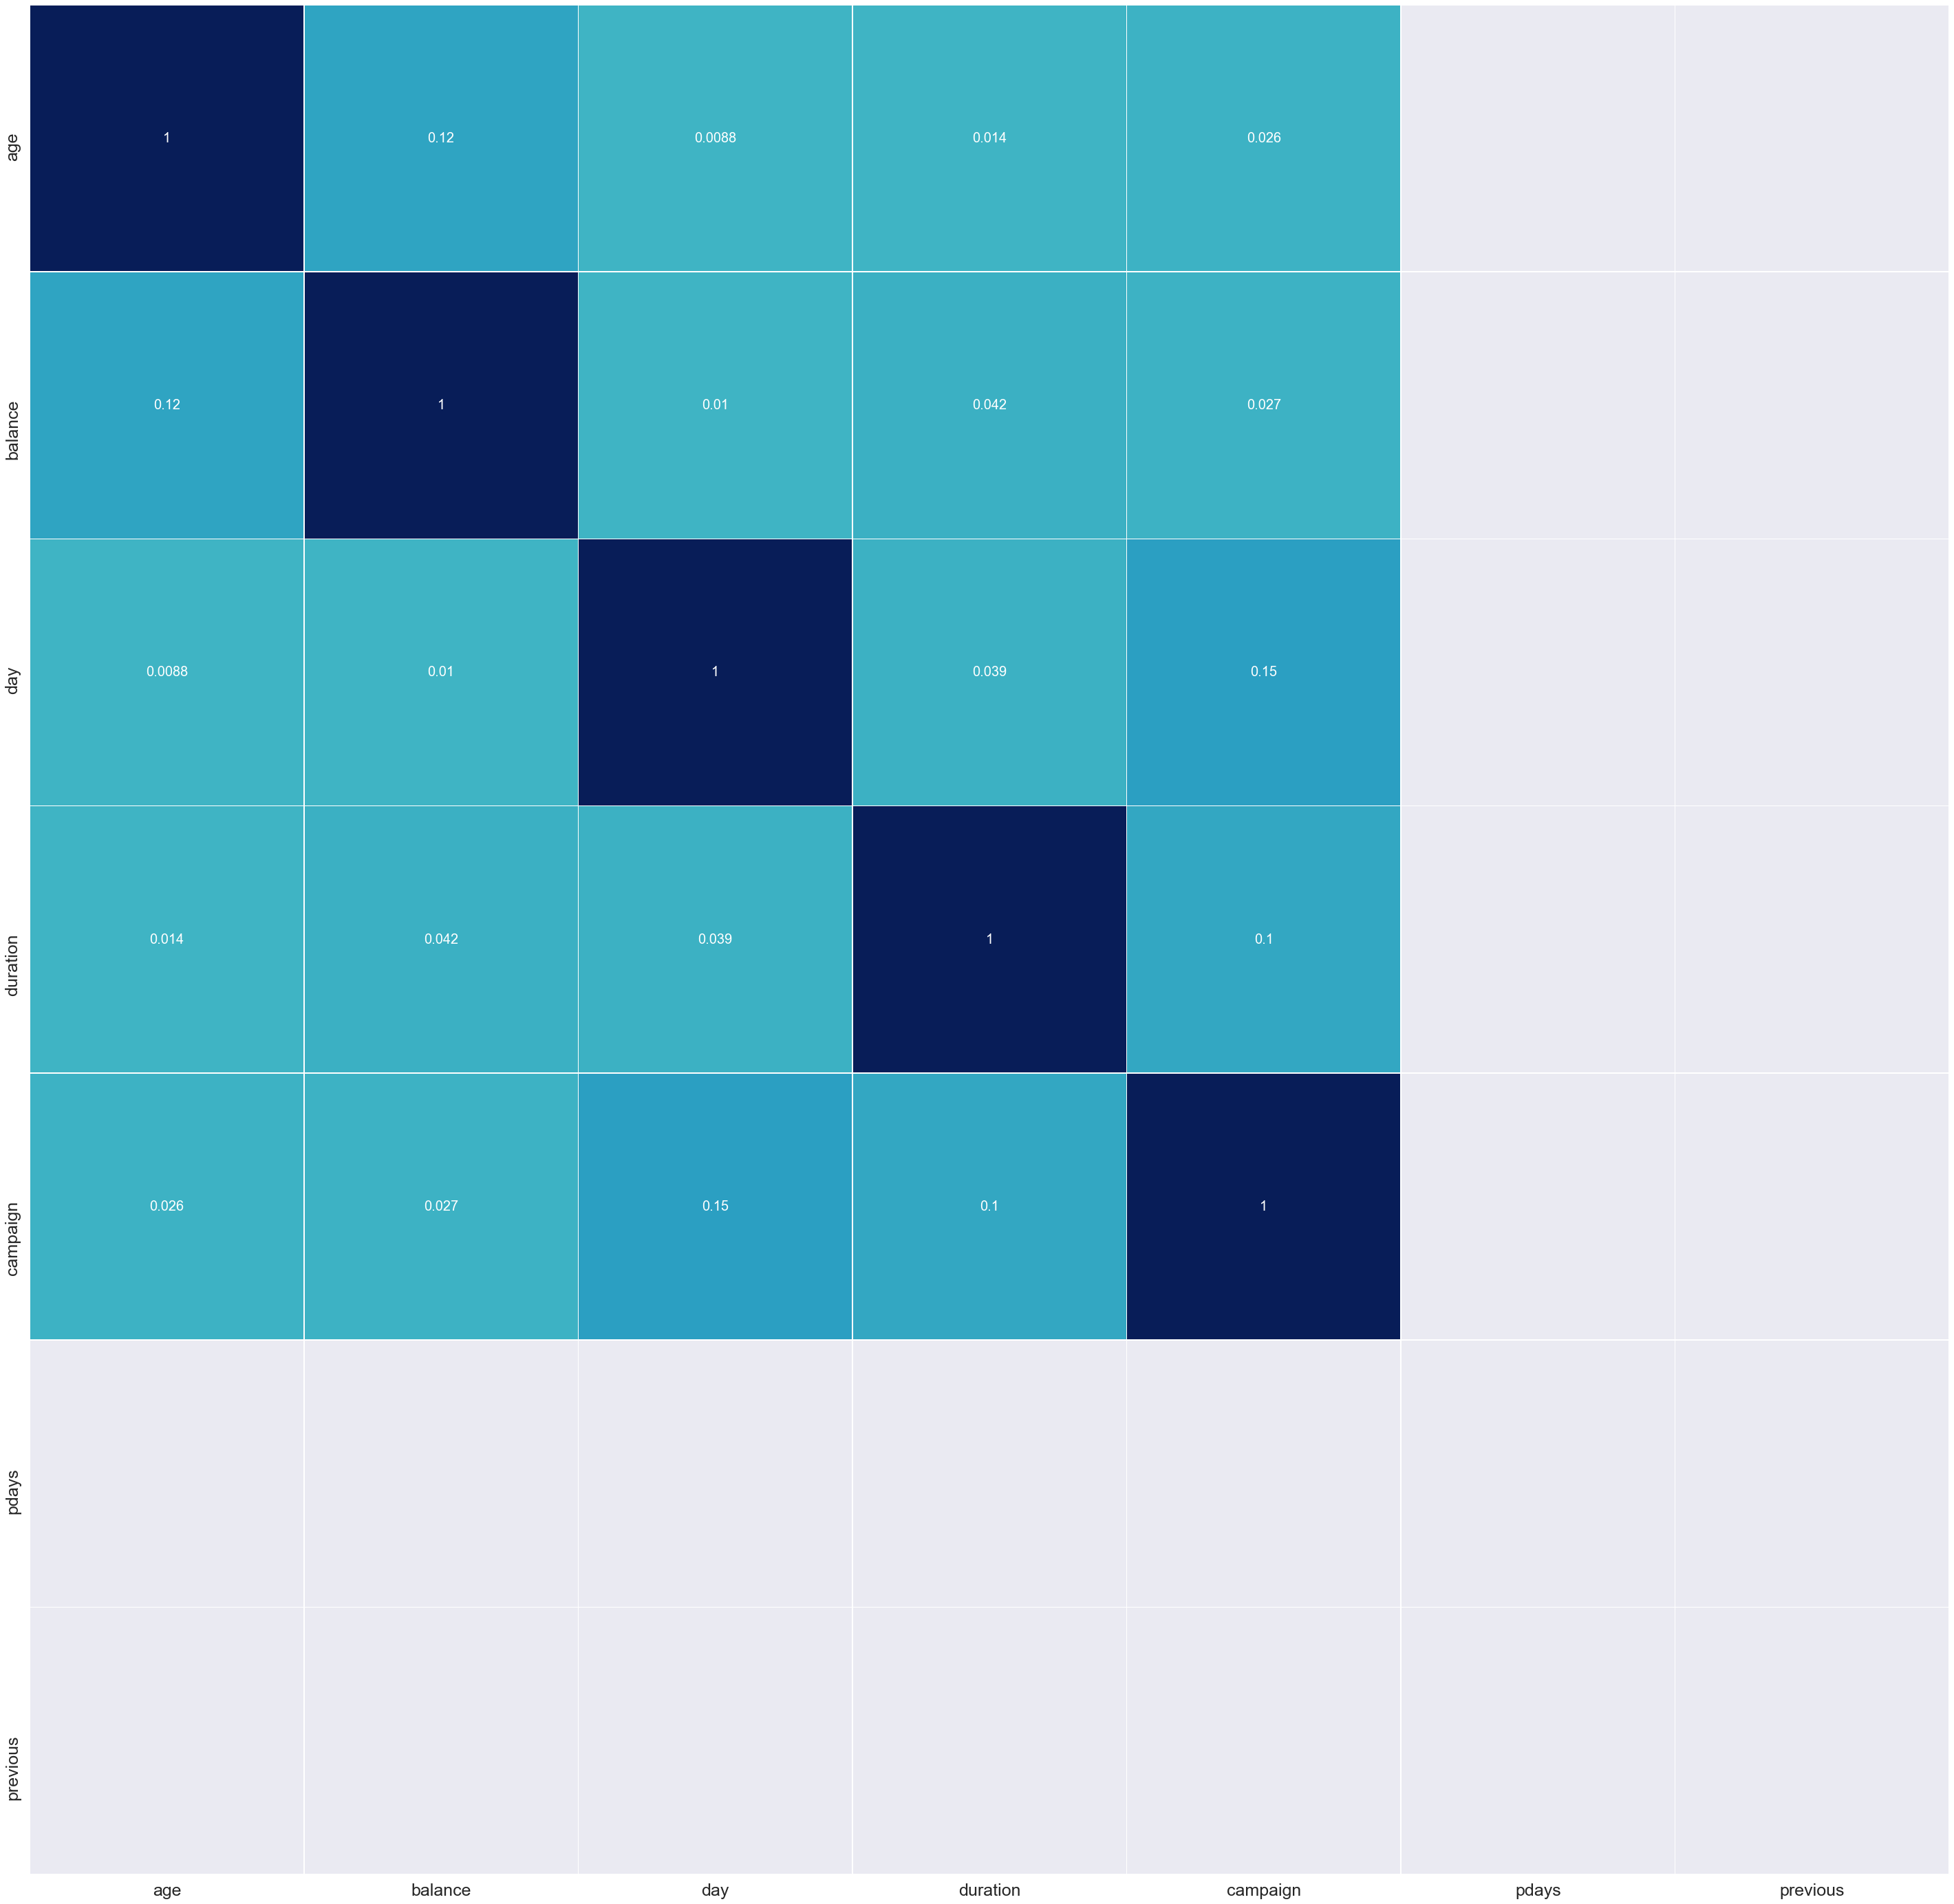

In [363]:
#### Correlation plot - Understanding degree of association among different variables
plt.figure(figsize=(50,50))
sns.set(font_scale=1.4)
corr1 = bank_df.corr()
#mask1 = np.tri(*corr.shape).T 
res = sns.heatmap(corr1.abs(),
            annot=True,
            #mask=mask1,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu", annot_kws={"size": 20})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 25)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 25)
plt.show()

- Looks like no correlation

### Handling unknown Entries 
####All unknown entries are considered as new customers who are not part of last campaign. So no action will be taken

In [364]:
#Converting the object(strings) datatypes to categorical.
for feature in bank_df.columns: # Loop through all columns in the dataframe
    if bank_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_df[feature] = pd.Categorical(bank_df[feature])# Replace strings with an integer
display(bank_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  float64 
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  float64 
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  float64 
 12  campaign   45211 non-null  float64 
 13  pdays      45211 non-null  float64 
 14  previous   45211 non-null  float64 
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), float64(6), int64(1)
memory usage: 2.8 MB


None

In [365]:
#replacing the categorical columns strings with values. 
replaceStruct = {
                 #"job":     {"blue-collar":  1 , "management":  2,  "technician":  3, "admin.":  4,      "services" :  5,  "retired"    :  6,  "self-employed" :  7,   "entrepreneur"  :  8, "unemployed" :  9, "housemaid"  :  10, "student"  :  11, "unknown"  :  -1 },
                 #"education": { "primary":1 , "secondary": 2, "tertiary": 3, "unknown": -1},
                 "default":     {"no": 0, "yes": 1 },
                 "housing":     {"no": 0, "yes": 1 },
                "loan":     {"no": 0, "yes": 1 },
                #"contact":     {"cellular": 1, "telephone": 2, "unknown": -1},
                #"month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12 }, 
                #"poutcome":     { "failure": 1 , "other": 2 , "success": 3 , "unknown": -1},
                "Target":     {"no": 0, "yes": 1}, 
                    }
oneHotCols=["education","job", "contact", "month", "marital", "poutcome"]

In [366]:
bank_df1=bank_df.replace(replaceStruct)

In [367]:
bank_df2=pd.get_dummies(bank_df1, columns=oneHotCols, drop_first=False)

In [368]:
bank_df2.head(10).T

0      1     2       3      4      5      6      7  \
age                    58.0   44.0  33.0    47.0   33.0   35.0   28.0   42.0   
default                 0.0    0.0   0.0     0.0    0.0    0.0    0.0    1.0   
balance              2143.0   29.0   2.0  1506.0    1.0  231.0  447.0    2.0   
housing                 1.0    1.0   1.0     1.0    0.0    1.0    1.0    1.0   
loan                    0.0    0.0   1.0     0.0    0.0    0.0    1.0    0.0   
day                     5.0    5.0   5.0     5.0    5.0    5.0    5.0    5.0   
duration              261.0  151.0  76.0    92.0  198.0  139.0  217.0  380.0   
campaign                1.0    1.0   1.0     1.0    1.0    1.0    1.0    1.0   
pdays                  -1.0   -1.0  -1.0    -1.0   -1.0   -1.0   -1.0   -1.0   
previous                0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
Target                  0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
education_primary       0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
education_secondary     0.0    1.0   1.0     0.0    0.0    0.0    0.0    0.0   
education_tertiary      1.0    0.0   0.0     0.0    0.0    1.0    1.0    1.0   
education_unknown       0.0    0.0   0.0     1.0    1.0    0.0    0.0    0.0   
job_admin.              0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
job_blue-collar         0.0    0.0   0.0     1.0    0.0    0.0    0.0    0.0   
job_entrepreneur        0.0    0.0   1.0     0.0    0.0    0.0    0.0    1.0   
job_housemaid           0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
job_management          1.0    0.0   0.0     0.0    0.0    1.0    1.0    0.0   
job_retired             0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
job_self-employed       0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
job_services            0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
job_student             0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
job_technician          0.0    1.0   0.0     0.0    0.0    0.0    0.0    0.0   
job_unemployed          0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
job_unknown             0.0    0.0   0.0     0.0    1.0    0.0    0.0    0.0   
contact_cellular        0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
contact_telephone       0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
contact_unknown         1.0    1.0   1.0     1.0    1.0    1.0    1.0    1.0   
month_apr               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_aug               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_dec               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_feb               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_jan               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_jul               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_jun               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_mar               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_may               1.0    1.0   1.0     1.0    1.0    1.0    1.0    1.0   
month_nov               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_oct               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
month_sep               0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
marital_divorced        0.0    0.0   0.0     0.0    0.0    0.0    0.0    1.0   
marital_married         1.0    0.0   1.0     1.0    0.0    1.0    0.0    0.0   
marital_single          0.0    1.0   0.0     0.0    1.0    0.0    1.0    0.0   
poutcome_failure        0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
poutcome_other          0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
poutcome_success        0.0    0.0   0.0     0.0    0.0    0.0    0.0    0.0   
poutcome_unknown        1.0    1.0   1.0     1.0    1.0    1.0    1.0    1.0   

                         

## Multivariate analysis(8marks)

a.Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.

b.Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

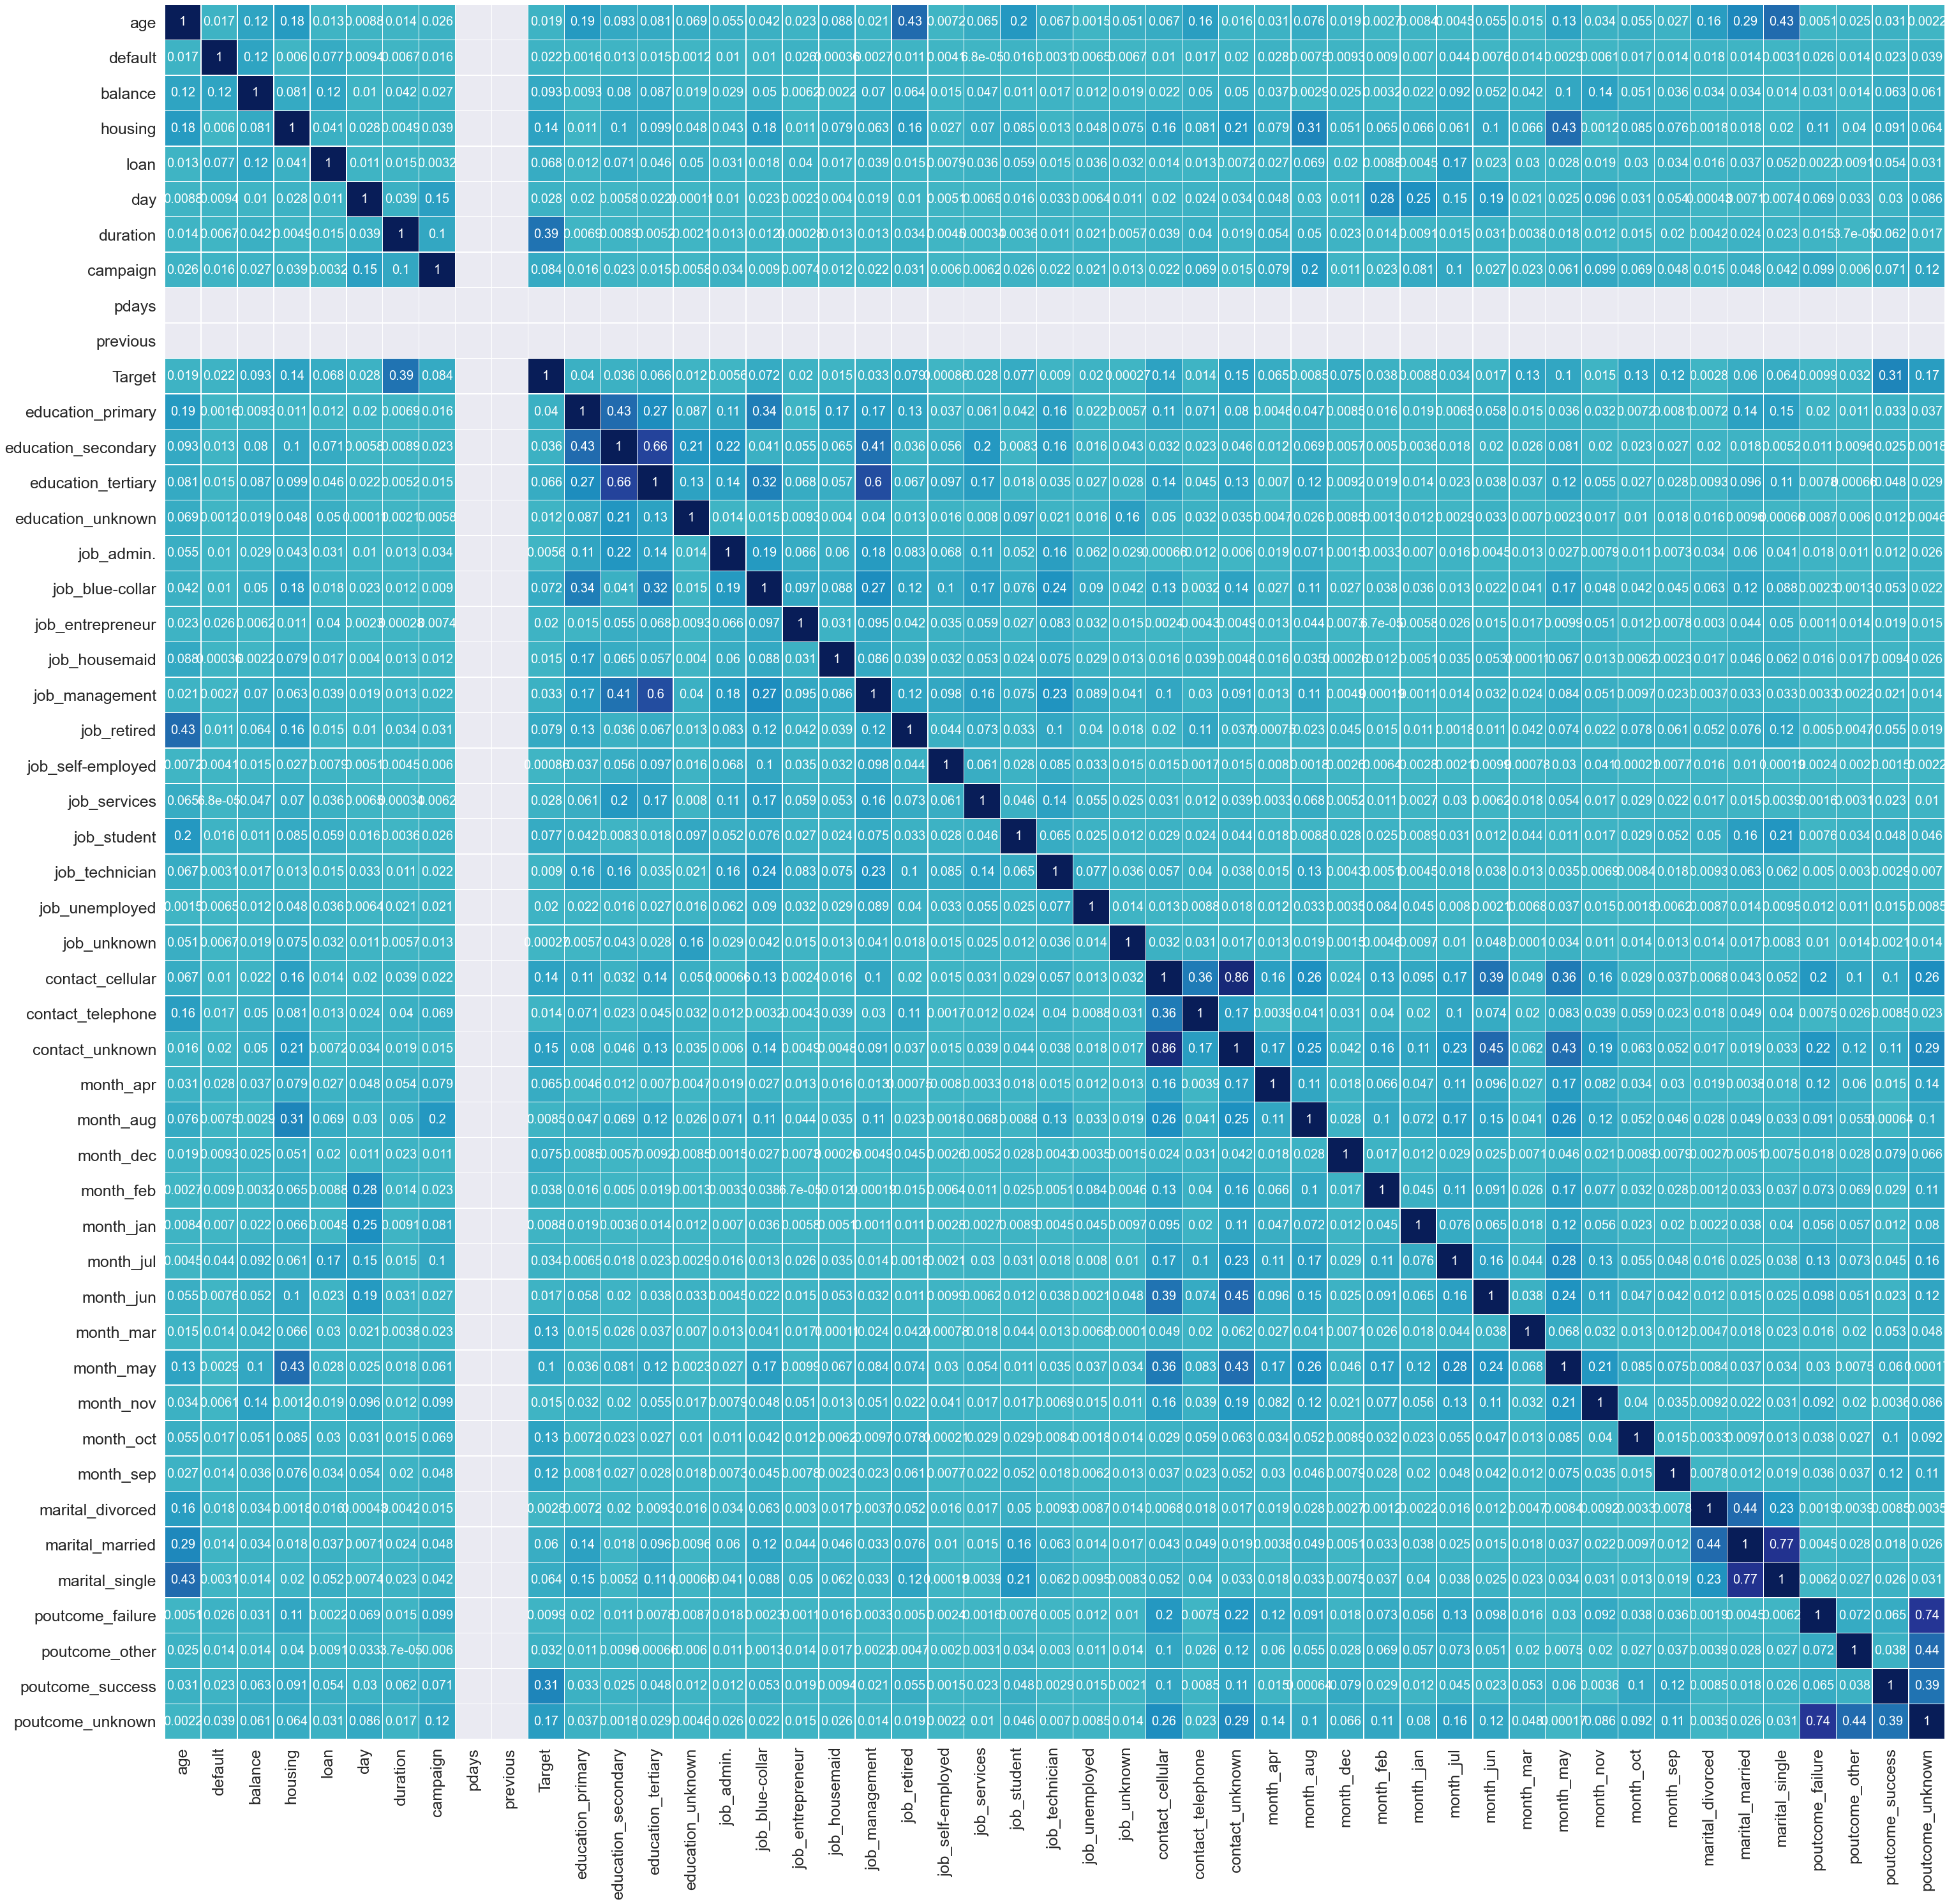

In [369]:
#### Correlation plot - Understanding degree of association among different variables
plt.figure(figsize=(50,50))
sns.set(font_scale=1.4)
corr1 = bank_df2.corr()
#mask1 = np.tri(*corr.shape).T 
res = sns.heatmap(corr1.abs(),
            annot=True,
            #mask=mask1,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu", annot_kws={"size": 20})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 25)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 25)
plt.show()

<b>Comments</b>
- target(term deposit subscription) has positive correlation(0.39) with last contact duration. However duration of current will be know only aftern campaign call. 
- target has positive correlation(0.31) with the success outcome of the previous marketing campaign
- housing loan has positive correlation(0.43) with contact in may of the year
- other correlations are there but not that important like marital status, education etc. 

# Deliverable 2(Prepare the data for analytics)–(10)
- 1.Ensure the attribute types are correct. If not, take appropriate actions.
- 2.Get the data model ready. 
- 3.Transform the data i.e. scale / normalize if required
- 4.Create the training set and test set in ratioof 70:30

In [370]:
#checking the attributes
display(bank_df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  float64
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   day                  45211 non-null  int64  
 6   duration             45211 non-null  float64
 7   campaign             45211 non-null  float64
 8   pdays                45211 non-null  float64
 9   previous             45211 non-null  float64
 10  Target               45211 non-null  int64  
 11  education_primary    45211 non-null  uint8  
 12  education_secondary  45211 non-null  uint8  
 13  education_tertiary   45211 non-null  uint8  
 14  education_unknown    45211 non-null  uint8  
 15  job_admin.           45211 non-null 

None

#### Duration is not required for identifying target customers for campaign. But maybe be usefull to benchmark the average call duration to be spent on targetted customers during the campaign. So it will be dropped from the dataframe

In [371]:
bank_df2.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0  58.0        0   2143.0        1     0    5     261.0       1.0   -1.0   
1  44.0        0     29.0        1     0    5     151.0       1.0   -1.0   
2  33.0        0      2.0        1     1    5      76.0       1.0   -1.0   
3  47.0        0   1506.0        1     0    5      92.0       1.0   -1.0   
4  33.0        0      1.0        0     0    5     198.0       1.0   -1.0   

   previous  ...  month_nov  month_oct  month_sep  marital_divorced  \
0       0.0  ...          0          0          0                 0   
1       0.0  ...          0          0          0                 0   
2       0.0  ...          0          0          0                 0   
3       0.0  ...          0          0          0                 0   
4       0.0  ...          0          0          0                 0   

   marital_married  marital_single  poutcome_failure  poutcome_other  \
0                1               0                 0               0   
1                0               1                 0               0   
2                1               0                 0               0   
3                1               0                 0               0   
4                0               1                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 49 columns]

In [372]:
# drop the duration column
bank_df3 = bank_df2.drop(columns=['duration'], inplace=False)
bank_df3.head()#verify the drop

age  default  balance  housing  loan  day  campaign  pdays  previous  \
0  58.0        0   2143.0        1     0    5       1.0   -1.0       0.0   
1  44.0        0     29.0        1     0    5       1.0   -1.0       0.0   
2  33.0        0      2.0        1     1    5       1.0   -1.0       0.0   
3  47.0        0   1506.0        1     0    5       1.0   -1.0       0.0   
4  33.0        0      1.0        0     0    5       1.0   -1.0       0.0   

   Target  ...  month_nov  month_oct  month_sep  marital_divorced  \
0       0  ...          0          0          0                 0   
1       0  ...          0          0          0                 0   
2       0  ...          0          0          0                 0   
3       0  ...          0          0          0                 0   
4       0  ...          0          0          0                 0   

   marital_married  marital_single  poutcome_failure  poutcome_other  \
0                1               0                 0               0   
1                0               1                 0               0   
2                1               0                 0               0   
3                1               0                 0               0   
4                0               1                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 48 columns]

In [373]:
#duplicate check
bank_df3.shape

(45211, 48)

In [374]:
#duplicate record deletion
bank_df3 = bank_df3.drop_duplicates()
bank_df3.shape

(45156, 48)

In [375]:
#levels of target variable
bank_df3['Target'].value_counts(normalize=True)

0    0.882873
1    0.117127
Name: Target, dtype: float64

In [376]:
# splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split

x_train_bef, x_test, y_train_bef, y_test =train_test_split(bank_df3.drop('Target',axis=1), bank_df3['Target'], test_size=.3,
                                                   random_state=22)
x_train_bef.shape,x_test.shape

((31609, 47), (13547, 47))

In [377]:
#!pip install imblearn

In [378]:
from imblearn.over_sampling import SMOTE

In [379]:
# Using SMOTE (Synthetic Minority Over-sampling Technique). creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class.
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train_bef, y_train_bef)

In [380]:
x_train.shape

(55722, 47)

# Deliverable –3 (create the ensemble model)–(30)
1.First create modelsusing Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1score of the model.(10marks)

#### 1. Creating Logistic Regression

In [381]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn
model = LogisticRegression(random_state=22, max_iter=5000)  #assigning a variable for the algorithm
model.fit(x_train, y_train); #training of model

In [382]:
y_predict_train=model.predict(x_train) #model is predicting y values based on train dataset given to the model
y_predict_test = model.predict(x_test) #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",round(model.score(x_train,y_train),4))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",round(model.score(x_test, y_test),4))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.9368

Testing accuracy 0.8938


In [383]:
## importing necessary metrics to evaluate model performance
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, log_loss

In [384]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training Data


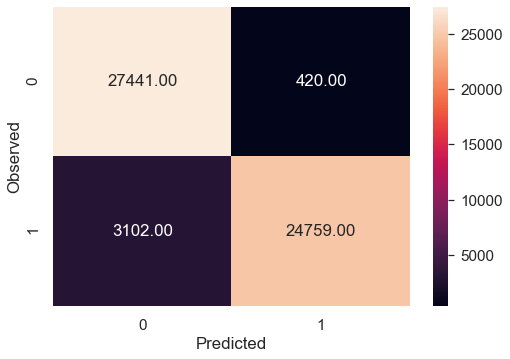

None

Test Data


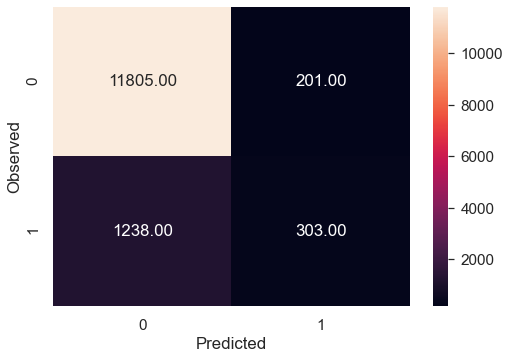

None

In [385]:
#Plotting Confusion Metric for both Test and Train Data Set
print("Training Data")
display(draw_cm(y_train,y_predict_train))
print("Test Data")
display(draw_cm(y_test,y_predict_test))

In [386]:
#-----------------------------------Regression Score--------------------------------------
print("Trainig accuracy",model.score(x_train,y_train))  
print("Testing accuracy",model.score(x_test, y_test))
print("-----------------------------------------------------------------------------------")
print("Recall Train:",recall_score(y_train,y_predict_train))
print("Recall Test:",recall_score(y_test,y_predict_test))
print("-----------------------------------------------------------------------------------")
print("Precision Train:",precision_score(y_train,y_predict_train))
print("Precision: Test",precision_score(y_test,y_predict_test))
print("-----------------------------------------------------------------------------------")
print("F1 Score Train:",f1_score(y_train,y_predict_train))
print("F1 Score: Test",f1_score(y_test,y_predict_test))
print("-----------------------------------------------------------------------------------")
print("Log Loss Train:",log_loss(y_train,y_predict_train))
print("Log Loss Test:",log_loss(y_test,y_predict_test))
print("-----------------------------------------------------------------------------------")
print("AOC Train:",roc_auc_score(y_train,y_predict_train))
print("AOC Test:",roc_auc_score(y_test,y_predict_test))
print("-----------------------------------------------------------------------------------")
print("F1 Train:",f1_score(y_train,y_predict_train))
print("F1 Test:",f1_score(y_test,y_predict_test))

Trainig accuracy 0.9367933670722516
Testing accuracy 0.8937772200487193
-----------------------------------------------------------------------------------
Recall Train: 0.8886615699364704
Recall Test: 0.19662556781310836
-----------------------------------------------------------------------------------
Precision Train: 0.9833194328607172
Precision: Test 0.6011904761904762
-----------------------------------------------------------------------------------
F1 Score Train: 0.9335972850678733
F1 Score: Test 0.2963325183374083
-----------------------------------------------------------------------------------
Log Loss Train: 2.1830857882666836
Log Loss Test: 3.6688167085967334
-----------------------------------------------------------------------------------
AOC Train: 0.9367933670722517
AOC Test: 0.5899419693138506
-----------------------------------------------------------------------------------
F1 Train: 0.9335972850678733
F1 Test: 0.2963325183374083


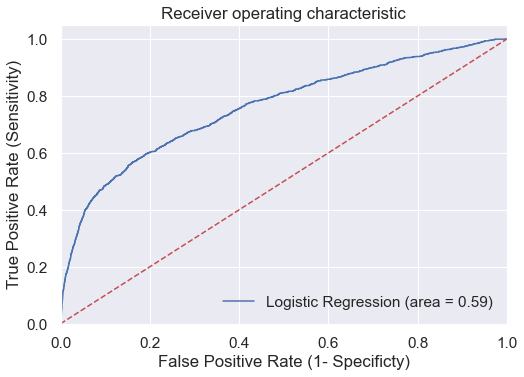

In [387]:
#AUC graph
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1- Specificty)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Identify the paramters(Solver, C-Value, Class Weight) for best logistic regression

In [388]:
# Checking Parameters of logistic regression
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 22,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [389]:
train_score=[]
test_score=[]
train_recall_score=[]
test_recall_score=[]

train_precision_score=[]
test_precision_score=[]

train_f1_score=[]
test_f1_score=[]

solver_info=[]
class_info=[]
C_info=[]

solver = ['newton-cg'#,'lbfgs'
          , 'liblinear', 'sag', 'saga']
class_weight=[None,'balanced']
C = [0.01,0.1,0.25,0.5,0.75,1]


for i in solver:
    for j in C:
        for k in class_weight:
            
            model = LogisticRegression(random_state=1, class_weight=k, C = j,solver=i)  # changing values of solver
    
            model.fit(x_train, y_train) 
            y_predict_train = model.predict(x_train) 
    
            train_score.append(round(model.score(x_train, y_train),3))
            train_recall_score.append(round(recall_score(y_train,y_predict_train),3))
            train_precision_score.append(round(precision_score(y_train,y_predict_train),3))
            train_f1_score.append(round(f1_score(y_train,y_predict_train),3))
            
            y_predict_test = model.predict(x_test) 
        
            test_score.append(round(model.score(x_test, y_test),3))
            test_recall_score.append(round(recall_score(y_test,y_predict_test),3))
            test_precision_score.append(round(precision_score(y_test,y_predict_test),3))
            test_f1_score.append(round(f1_score(y_test,y_predict_test),3))
            
            solver_info.append(i)
            C_info.append(j)
            class_info.append(k)

In [390]:
i = np.arange(len(test_recall_score))
resultDF = pd.DataFrame({'Solver': pd.Series(solver_info,index=i),'C Value' : pd.Series(C_info, index=i),\
                    'Class Weight' : pd.Series(class_info, index = i),\
                    'train_accuracy_scores' : pd.Series(train_score, index = i),\
                    'test_accuracy_scores' : pd.Series(test_score, index = i),
                    'train_recall_scores' : pd.Series(train_recall_score, index = i),\
                   'test_recall_scores' : pd.Series(test_recall_score, index = i),\
                    'train_precision_scores' : pd.Series(train_precision_score, index = i),\
                   'test_precision_scores' : pd.Series(test_precision_score, index = i),\
                    'train_f1_scores' : pd.Series(train_f1_score, index = i),\
                    'test_f1_scores' : pd.Series(test_f1_score, index = i)})

In [391]:
resultDF.head()

Solver  C Value Class Weight  train_accuracy_scores  \
0  newton-cg     0.01         None                  0.930   
1  newton-cg     0.01     balanced                  0.930   
2  newton-cg     0.10         None                  0.936   
3  newton-cg     0.10     balanced                  0.936   
4  newton-cg     0.25         None                  0.936   

   test_accuracy_scores  train_recall_scores  test_recall_scores  \
0                 0.891                0.885               0.262   
1                 0.891                0.885               0.262   
2                 0.893                0.890               0.221   
3                 0.893                0.890               0.221   
4                 0.893                0.889               0.209   

   train_precision_scores  test_precision_scores  train_f1_scores  \
0                   0.973                  0.539            0.927   
1                   0.973                  0.539            0.927   
2                   0.980                  0.571            0.933   
3                   0.980                  0.571            0.933   
4                   0.981                  0.578            0.933   

   test_f1_scores  
0           0.352  
1           0.352  
2           0.319  
3           0.319  
4           0.307

In [392]:
#duplicate record deletion
resultDF.drop_duplicates(inplace = True)
#resultDF[resultDF['test_f1_scores']==resultDF['test_f1_scores'].max()].iloc[0]


In [393]:
resultDF[resultDF['test_precision_scores']==resultDF['test_precision_scores'].max()].iloc[0]

Solver                    newton-cg
C Value                           1
Class Weight                   None
train_accuracy_scores         0.937
test_accuracy_scores          0.893
train_recall_scores            0.89
test_recall_scores            0.201
train_precision_scores        0.983
test_precision_scores         0.592
train_f1_scores               0.934
test_f1_scores                  0.3
Name: 10, dtype: object

In [394]:
#Store the metrics results for each model in a dataframe for final comparison
accuracy_score_LT = resultDF[resultDF['test_precision_scores']==resultDF['test_precision_scores'].max()].iloc[0][['test_accuracy_scores']]
recall_score_LT = resultDF[resultDF['test_precision_scores']==resultDF['test_precision_scores'].max()].iloc[0][['test_recall_scores']]
precision_score_LT = resultDF[resultDF['test_precision_scores']==resultDF['test_precision_scores'].max()].iloc[0][['test_precision_scores']]
f1_score_LT = resultDF[resultDF['test_precision_scores']==resultDF['test_precision_scores'].max()].iloc[0][['test_f1_scores']]


resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': accuracy_score_LT['test_accuracy_scores'], 'recall': recall_score_LT['test_recall_scores'], 'precision': precision_score_LT['test_precision_scores'], 'f1': f1_score_LT['test_f1_scores']})
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1']]
resultsDf

Method  accuracy  recall  precision   f1
0  Logistic Regression     0.893   0.201      0.592  0.3

Comment: 
- printing metrics for max precision score of logistic regression to achieve high hit ratio
- Recall score is not good. Need further improvement

#### 2.Decision Tree

<b> Decision Tree - Entrophy method without pruning </b>

In [395]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [396]:
#training the model
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [397]:
#printing the tree details - nodes, depth and leaves
treeObj = model_entropy.tree_
print ('Total Nodes:',treeObj.node_count)
print('Depth:',model_entropy.get_depth())
print('Total Leaves:',model_entropy.get_n_leaves())

Total Nodes: 8899
Depth: 37
Total Leaves: 4450


In [398]:
#Print the accuracy of the model 
print("Train: %.2f" % model_entropy.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(x_test, y_test))  # performance on test data

Train: 1.00
Test: 0.83


Comment 
- Due to overfitting(we didnt restrict depth) in the model the test accuracy has dropped.

In [399]:
#Prepare confusion matrix
preds_train = model_entropy.predict(x_train)
preds_test = model_entropy.predict(x_test)

acc_DT = accuracy_score(y_test, preds_test)

In [400]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted      0     1
Actual                
0          10763  1243
1           1024   517

<b> Decision Tree - Entrophy method with pruning </b>

In [401]:
#### Regularize/prune the decision tree by limiting the max. depth of trees
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_leaf=10, random_state=42)
#training the pruned model
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=42)

In [402]:
#printing the tree details - nodes, depth and leaves
prunedtreeObj = clf_pruned.tree_
print ('Total Nodes:',prunedtreeObj.node_count)
print('Depth:',clf_pruned.get_depth())
print('Total Leaves:',clf_pruned.get_n_leaves())

Total Nodes: 61
Depth: 5
Total Leaves: 31


In [403]:
#Print the accuracy for the pruned tree model
print("Train: %.2f" % clf_pruned.score(x_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(x_test, y_test))  # performance on test data

Train: 0.85
Test: 0.82


Comment
- After pruning of model, there is no variation in test and train accuracy. And the model looks like not overfitted. 

In [404]:
#prepare confusion matrix
prunepreds_train = clf_pruned.predict(x_train)
prunepreds_test = clf_pruned.predict(x_test)

acc_DT = accuracy_score(y_test, preds_test)
recall_DT = recall_score(y_test, preds_test)
precision_DT = precision_score(y_test, preds_test)
f1_DT = f1_score(y_test, preds_test)

In [405]:
# Confusion matrix
pd.crosstab(y_test, prunepreds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted      0     1
Actual                
0          10413  1593
1            813   728

In [406]:
#printing metrics for pruned model
print("Trainig accuracy",clf_pruned.score(x_train,y_train))  
print("Testing accuracy",clf_pruned.score(x_test, y_test))
print("----------------------Micro-----------------------------------------")
print("Recall:",recall_score(y_test,preds_test, average="micro"))
print("Precision:",precision_score(y_test,preds_test, average="micro"))
print("F1:",f1_score(y_test,preds_test, average="micro"))
print("AOC:",roc_auc_score(y_test,preds_test, average="micro"))
print("Log Loss:",log_loss(y_test,preds_test))

print("----------------------Macro-----------------------------------------")
print("Recall:",recall_score(y_test,preds_test, average="macro"))
print("Precision:",precision_score(y_test,preds_test, average="macro"))
print("F1:",f1_score(y_test,preds_test, average="macro"))
print("AOC:",roc_auc_score(y_test,preds_test, average="macro"))
print("Log Loss:",log_loss(y_test,preds_test))

Trainig accuracy 0.8528767811636337
Testing accuracy 0.8223961024581088
----------------------Micro-----------------------------------------
Recall: 0.8326566767550011
Precision: 0.8326566767550011
F1: 0.8326566767550011
AOC: 0.6159824316697373
Log Loss: 5.77990698950825
----------------------Macro-----------------------------------------
Recall: 0.6159824316697373
Precision: 0.6034373144141851
F1: 0.6089791440979518
AOC: 0.6159824316697373
Log Loss: 5.77990698950825


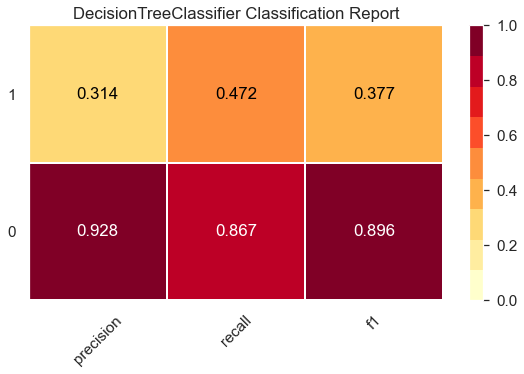

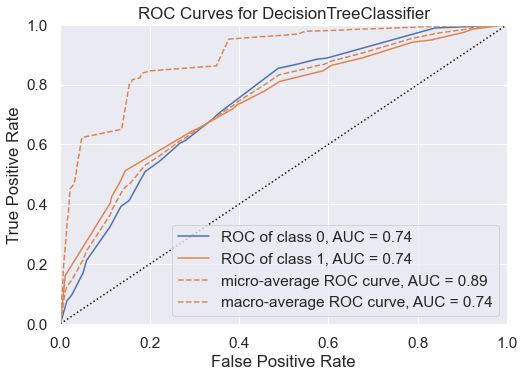

In [407]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_leaf=10)) #gini
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_leaf=10)) #gini
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [408]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

features = [col for col in bank_df.columns if col != 'Target']

feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False).head(5)

0
education  0.086797
balance    0.004659
previous   0.001255
default    0.001099
age        0.000822

In [409]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree - Entropy - Pruned'], 'accuracy': acc_DT, 'recall': recall_DT, 'precision': precision_DT, 'f1': f1_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1']]
resultsDf

Method  accuracy    recall  precision        f1
0               Logistic Regression  0.893000  0.201000    0.59200  0.300000
0  Decision Tree - Entropy - Pruned  0.832657  0.335496    0.29375  0.313238

### 2.Build the ensemble models(Bagging and Boosting)and note the model performanceby using different matrices. Use same metrics as in above model. (at least 3 algorithms)(15 marks)

#### 1.Creating Random Forest

In [410]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, max_samples=0.8, random_state=42)
rfcl = rfcl.fit(x_train, y_train)
rfcl

RandomForestClassifier(max_samples=0.8, n_estimators=50, random_state=42)

In [411]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF)
precision_RF = precision_score(y_test, pred_RF)
f1_RF = f1_score(y_test, pred_RF)

In [412]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF], 'recall': recall_RF, 'precision': precision_RF, 'f1': f1_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1']]
resultsDf

Method  accuracy    recall  precision        f1
0               Logistic Regression  0.893000  0.201000   0.592000  0.300000
0  Decision Tree - Entropy - Pruned  0.832657  0.335496   0.293750  0.313238
0                     Random Forest  0.890234  0.268657   0.534884  0.357667

In [413]:
## Calculating feature importance

feat_importance = rfcl.feature_importances_
feat_imp_dict = dict(zip(features, rfcl.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
education  0.070795
marital    0.063924
age        0.063393
housing    0.057101
balance    0.056709
previous   0.028395
default    0.025936
month      0.025260
duration   0.019554
day        0.019277
pdays      0.012891
campaign   0.007484
poutcome   0.004021
job        0.001090
loan       0.000000
contact    0.000000

In [414]:
rfcl.estimators_[5]

DecisionTreeClassifier(max_features='auto', random_state=1201263687)

#### 2.Creating Bagging

In [415]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .8, bootstrap=True, random_state=22)
#------bootstrap=True signifies that entire sample is not used to develop a tree
bgcl = bgcl.fit(x_train, y_train)

In [416]:
pred_BG = bgcl.predict(x_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG)
precision_BG = precision_score(y_test, pred_BG)
f1_BG = f1_score(y_test, pred_BG)

In [417]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': acc_BG, 'recall': recall_BG, 'precision': precision_BG, 'f1': f1_BG})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1']]
resultsDf

Method  accuracy    recall  precision        f1
0               Logistic Regression  0.893000  0.201000   0.592000  0.300000
0  Decision Tree - Entropy - Pruned  0.832657  0.335496   0.293750  0.313238
0                     Random Forest  0.890234  0.268657   0.534884  0.357667
0                           Bagging  0.887650  0.285529   0.511034  0.366361

#### 3.Creating Boosting

In [418]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, random_state=22)
abcl = abcl.fit(x_train, y_train)

# n_estimator - The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

In [419]:
pred_AB =abcl.predict(x_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB)
precision_AB = precision_score(y_test, pred_AB)
f1_AB = f1_score(y_test, pred_AB)

In [420]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB], 'recall': [recall_AB], 'precision': [precision_AB], 'f1': [f1_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1']]
resultsDf

Method  accuracy    recall  precision        f1
0               Logistic Regression  0.893000  0.201000   0.592000  0.300000
0  Decision Tree - Entropy - Pruned  0.832657  0.335496   0.293750  0.313238
0                     Random Forest  0.890234  0.268657   0.534884  0.357667
0                           Bagging  0.887650  0.285529   0.511034  0.366361
0                          Adaboost  0.890529  0.241402   0.542274  0.334082

#### 4.Creating Gradient Boosting

In [421]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

In [422]:
pred_GB = gbcl.predict(x_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB)
precision_GB = precision_score(y_test, pred_GB)
f1_GB = f1_score(y_test, pred_GB)

### 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

In [423]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB], 'recall': [recall_GB], 'precision': [precision_GB], 'f1': [f1_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','recall','precision','f1']]
resultsDf

Method  accuracy    recall  precision        f1
0               Logistic Regression  0.893000  0.201000   0.592000  0.300000
0  Decision Tree - Entropy - Pruned  0.832657  0.335496   0.293750  0.313238
0                     Random Forest  0.890234  0.268657   0.534884  0.357667
0                           Bagging  0.887650  0.285529   0.511034  0.366361
0                          Adaboost  0.890529  0.241402   0.542274  0.334082
0                    Gradient Boost  0.884550  0.394549   0.490718  0.437410

# Conclusion
To have a high hit ratio, we need high precision. Logistics algorithm has high precision however the recall is  low. F1 which is a balance between Precision and Recall, is high for Gradient Boost. So i think the <b> Best algorithm is Gradient Boost. However further improvement in precision and recall scores is required which may be achieved by altering the parameters of the algorithm. </b>.